<a href="https://colab.research.google.com/github/sivani-tutika/LLM-Growth-Training/blob/main/Wiki_103_dataset_Benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

tnssivani_shakespeare_dataset_path = kagglehub.dataset_download('tnssivani/shakespeare-dataset')

print('Data source import complete.')


<a href="https://colab.research.google.com/github/sivani-tutika/LLM-Growth-Training/blob/main/When_to_grow_shakespeare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing Best models of pre-trained methods

Comperative Survey:

Wiki - 2

| Model | Category | Validation Loss | Training FLOPs | Memory | Time |
|-|-|-|-|-|-|
|Stacking|-|-|-|-|-|
|LiGO Depth only|-|-|-|-|-|
|CrossLiGO depth only|-|-|-|-|-|
|StackLiGO depth only|-|-|-|-|-|


Wiki - 103

| Model | Category | Validation Loss | Training FLOPs | Memory | Time |
|-|-|-|-|-|-|
|Stacking|-|-|-|-|-|
|LiGO Depth only|-|-|-|-|-|
|CrossLiGO depth only|-|-|-|-|-|
|StackLiGO depth only|-|-|-|-|-|


Shakespeare

| Model | Category | Validation Loss | Training FLOPs | Memory | Time |
|-|-|-|-|-|-|
|Stacking|-|-|-|-|-|
|LiGO Depth only|-|-|-|-|-|
|CrossLiGO depth only|-|-|-|-|-|
|StackLiGO depth only|-|-|-|-|-|


---

"When to grow policy"

Wiki-2

| Model | Category | Validation Loss | Training FLOPs | Memory | Time |
|-|-|-|-|-|-|
|Periodic|-|-|-|-|-|
|Convergence|-|-|-|-|-|
|LipGrow|-|-|-|-|-|
|FRAWGrow|-|-|-|-|-|

Wiki-103

| Model | Category | Validation Loss | Training FLOPs | Memory | Time |
|-|-|-|-|-|-|
|Periodic|-|-|-|-|-|
|Convergence|-|-|-|-|-|
|LipGrow|-|-|-|-|-|
|FRAWGrow|-|-|-|-|-|

Shakespeare

| Model | Category | Validation Loss | Training FLOPs | Memory | Time |
|-|-|-|-|-|-|
|Periodic|-|-|-|-|-|
|Convergence|-|-|-|-|-|
|LipGrow|-|-|-|-|-|
|FRAWGrow|-|-|-|-|-|

# Libraries

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

Looking in indexes: https://download.pytorch.org/whl/cu126
   ---------------------------------------- 0.0/6.1 MB ? eta -:--:--
   ---------------------------------------- 6.1/6.1 MB 31.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.5 GB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 GB 124.1 MB/s eta 0:00:20
    --------------------------------------- 0.0/2.5 GB 122.0 MB/s eta 0:00:21
   - -------------------------------------- 0.1/2.5 GB 120.0 MB/s eta 0:00:21
   - -------------------------------------- 0.1/2.5 GB 119.7 MB/s eta 0:00:21
   - -------------------------------------- 0.1/2.5 GB 118.5 MB/s eta 0:00:21
   -- ------------------------------------- 0.1/2.5 GB 114.6 MB/s eta 0:00:21
   -- ------------------------------------- 0.2/2.5 GB 113.0 MB/s eta 0:00:21
   -- ------------------------------------- 0.2/2.5 GB 112.8 MB/s eta 0:00:21
   --- ------------------------------------ 0.2/2.5 GB 111.0 MB/s eta 0:00:21
   --- -----------------

In [1]:
!pip install pytorch
!pip install transformers
!pip install datasets
!pip install calflops
!pip install matplotlib

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pytorch)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import math
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from transformers import GPT2Tokenizer, DataCollatorForLanguageModeling
from datasets import load_dataset
from calflops import calculate_flops
import matplotlib.pyplot as plt
import time

# Settings

In [3]:
# LiGO_bool = True
# emb_size = 256
# new_emb_size = 512
# block_size = 128
# multi_heads = 2
# batch_size = 16
# epochs = 3
# learning_rate = 3e-4
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# num_small_layers = 4
# multi_heads = 2
# num_large_layers = 8


LiGO_bool = True
emb_size = 128
new_emb_size = 256
block_size = 64
multi_heads = 2
batch_size = 16
epochs = 3
learning_rate = 3e-4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_small_layers = 4
multi_heads = 2
num_large_layers = 8
batches_per_epoch = 10

# Datasets

## Shakespeare

In [4]:
# import torch

# path = '/kaggle/input/shakespeare-dataset/shakespeare_dat.txt'
# # Load and process Shakespeare dataset
# with open(path, 'r') as f:
#     dat = f.read()

# chars = sorted(list(set(dat)))
# stoi = {ch: i for i, ch in enumerate(chars)}
# itos = {i: ch for i, ch in enumerate(chars)}
# encode = lambda s: [stoi[c] for c in s]
# decode = lambda i: ''.join([itos[l] for l in i])

# # Convert text to tensor
# data = torch.tensor(encode(dat))

# # Train-test split (90% train, 10% validation)
# n = int(0.9 * len(data))
# shakespeare_train = data[:n]
# shakespeare_val = data[n:]

# #Dataset wikitext-2
# dataset = load_dataset('wikitext', 'wikitext-2-v1')

# Dataset wikitext-103
dataset = load_dataset('wikitext', 'wikitext-103-raw-v1')

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# padding token
tokenizer.add_special_tokens({'pad_token': '[PAD]'})
vocab_size = len(tokenizer)

def tokenize_function(examples):
    return tokenizer(examples['text'], return_tensors='pt', truncation=True, padding='max_length', max_length=block_size)

tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=["text"])
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

train_dataset = tokenized_datasets["train"]
val_dataset = tokenized_datasets["validation"]
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size, collate_fn=data_collator)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=batch_size, collate_fn=data_collator)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/733k [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/157M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/157M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/657k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/1801350 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Map:   0%|          | 0/4358 [00:00<?, ? examples/s]

Map:   0%|          | 0/1801350 [00:00<?, ? examples/s]

Map:   0%|          | 0/3760 [00:00<?, ? examples/s]

In [5]:
train_dataloader = list(train_dataloader)
val_dataloader = list(val_dataloader)

In [6]:

# # Hyperparameters
# LiGO_bool = True
# block_size = 8
# batch_size = 2048
# val_batch_size = 2048
# vocab_size = len(chars)
# emb_size = 32
# new_emb_size = 64
# num_small_layers = 4
# multi_heads = 2
# num_large_layers = 8
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [7]:
# import torch
# from torch.utils.data import Dataset, DataLoader
# import numpy as np

# # Load Shakespeare text from file
# with open('/content/shakespeare_dat.txt', 'r') as f:
#     dat = f.read()

# # Character mappings
# chars = sorted(list(set(dat)))
# stoi = {ch: i for i, ch in enumerate(chars)}
# itos = {i: ch for i, ch in enumerate(chars)}
# encode = lambda s: [stoi[c] for c in s]  # Convert text to integer list
# decode = lambda i: ''.join([itos[l] for l in i])  # Convert int list to text


# # Hyperparameters (Global)
# block_size = 8
# batch_size = 2048
# val_batch_size = 2048
# vocab_size = len(chars)
# train_frac = 0.9  # Fraction for train-validation split


# # Convert text data to tensor
# data = torch.tensor(encode(dat), dtype=torch.long)

# # Shuffle and Split Dataset
# def shuffle_and_split(data, train_frac=0.9):
#     n = int(train_frac * len(data))  # Split point
#     indices = torch.randperm(len(data)).tolist()  # Shuffle indices
#     train_data = data[indices[:n]]
#     val_data = data[indices[n:]]
#     return train_data, val_data

# # Shuffle and split data
# train_data, val_data = shuffle_and_split(data)

# # Define a PyTorch Dataset
# class ShakespeareDataset(Dataset):
#     def __init__(self, data, block_size):
#         self.data = data
#         self.block_size = block_size

#     def __len__(self):
#         return len(self.data) - self.block_size

#     def __getitem__(self, idx):
#         x = self.data[idx:idx + self.block_size]
#         y = self.data[idx + 1:idx + self.block_size + 1]
#         return x, y

# # Create DataLoader objects with custom variable names
# shakespeare_train_dataset = ShakespeareDataset(train_data, block_size)
# shakespeare_val_dataset = ShakespeareDataset(val_data, block_size)

# shakespeare_train_loader = DataLoader(shakespeare_train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
# shakespeare_val_loader = DataLoader(shakespeare_val_dataset, batch_size=val_batch_size, shuffle=False, drop_last=True)


# Transformer Architecture

In [8]:
# LiGO_bool = True
# emb_size = 256
# new_emb_size = 512
# block_size = 128
# multi_heads = 2
# batch_size = 16
# epochs = 3
# learning_rate = 3e-4
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# num_small_layers = 4
# multi_heads = 2
# num_large_layers = 8

## Basic blocks

In [9]:
class AttentionHead(torch.nn.Module):
    def __init__(self, big=False):
        super(AttentionHead, self).__init__()
        self.k = torch.nn.Linear(new_emb_size if big else emb_size, new_emb_size if big else emb_size, bias=False)
        self.q = torch.nn.Linear(new_emb_size if big else emb_size, new_emb_size if big else emb_size, bias=False)
        self.v = torch.nn.Linear(new_emb_size if big else emb_size, new_emb_size if big else emb_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size,block_size)))
    def forward(self, e):
        keys = self.k(e)
        queries = self.q(e)
        values = self.v(e)
        ret = keys @ queries.transpose(1, 2)*(1.0/math.sqrt(keys.size(-1)))
        ret = torch.masked_fill(ret, self.tril==0, -torch.inf)
        ret = torch.softmax(ret, 2)
        ret = ret @ values
        return ret

In [10]:
class MultiHead(torch.nn.Module):
    def __init__(self, big=False):
        super(MultiHead, self).__init__()
        self.head1 = AttentionHead(big)
        self.head2 = AttentionHead(big)
        self.mh_lin = torch.nn.Linear(multi_heads*(new_emb_size if big else emb_size), new_emb_size if big else emb_size, bias=False)
        self.drop = torch.nn.Dropout(0.1)
    def forward(self, inp):
        x1 = self.head1(inp)
        x2 = self.head2(inp)
        return self.mh_lin(self.drop(torch.cat([x1,x2], dim=2))).relu()

In [11]:
class PositionalEncoding(torch.nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.dropout = torch.nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)

In [12]:
class Block(torch.nn.Module):
    def __init__(self, big=False):
        super(Block, self).__init__()
        self.multihead = MultiHead(big)
        self.l_norm_1 = torch.nn.LayerNorm(new_emb_size if big else emb_size)
        self.l_norm_2 = torch.nn.LayerNorm(new_emb_size if big else emb_size)
        self.ffn = torch.nn.Linear(new_emb_size if big else emb_size, new_emb_size if big else emb_size)
        self.drop = torch.nn.Dropout(0.1)
    def forward(self, inp):
        m = self.l_norm_1(inp + self.multihead(inp))
        m = self.l_norm_2(m + self.ffn(self.drop(m)).relu())
        return m

# Train & Validation


## Static methods

In [13]:
# loss_fn = torch.nn.CrossEntropyLoss()

# @torch.no_grad()
# def validate(mdl, dataloader):
#     mdl.to(device)
#     mdl.eval()
#     total_loss = 0
#     num_batches = 0

#     torch.cuda.reset_peak_memory_stats(device)  # Reset memory stats

#     start_time = time.time()
#     for batch in dataloader:
#         inputs = batch["input_ids"].squeeze(1).to(device)
#         outputs = mdl(inputs)
#         loss = loss_fn(outputs.view(-1, vocab_size), inputs.view(-1))
#         total_loss += loss.item()
#         num_batches += 1

#     val_time = time.time() - start_time
#     max_memory = torch.cuda.max_memory_allocated(device) / (1024 ** 2)

#     print(f"Validation Time: {val_time:.2f}s, Max Memory Usage: {max_memory:.2f} MB")

#     return total_loss / num_batches


# import torch
# import time
# import psutil

# def get_cpu_memory():
#     """Returns current CPU memory usage in MB."""
#     process = psutil.Process()
#     return process.memory_info().rss / (1024 ** 2)  # Convert bytes to MB

# def train(mdl, optim, epochs, train_dataloader, val_dataloader):
#     mdl.to(device)

#     train_losses_epoch = []
#     val_losses_epoch = []

#     train_times = []   # Training time per epoch
#     val_times = []     # Validation time per epoch
#     gpu_memory_usage = []  # GPU memory per epoch
#     cpu_memory_usage = []  # CPU memory per epoch
#     flops_per_epoch = []   # FLOPs per epoch

#     for epoch in range(epochs):
#         start_time = time.time()
#         mdl.train()
#         total_loss = 0
#         num_batches = 0
#         total_flops = 0  # Track FLOPs for this epoch

#         torch.cuda.reset_peak_memory_stats(device)  # Reset GPU memory tracking

#         for batch in train_dataloader:
#             inputs = batch["input_ids"].squeeze(1).to(device)
#             optim.zero_grad()
#             outputs = mdl(inputs).to(device)
#             loss = loss_fn(outputs.view(-1, vocab_size), inputs.view(-1))
#             loss.backward()
#             optim.step()

#             total_loss += loss.item()
#             num_batches += 1

#             # Compute FLOPs for this batch
#             flops, _, _ = calculate_flops(model=mdl.to(device), kwargs={'inp': inputs},
#                                           print_detailed=False, print_results=False, output_as_string=False)
#             total_flops += flops  # Accumulate FLOPs

#             if num_batches % 100 == 0:
#                 print(f"{num_batches} processed")

#         train_time = time.time() - start_time  # Epoch training time
#         train_times.append(train_time)

#         # Store memory usage
#         max_gpu_memory = torch.cuda.max_memory_allocated(device) / (1024 ** 2)  # MB
#         max_cpu_memory = get_cpu_memory()  # MB

#         # gpu_memory_usage.append(max_gpu_memory)
#         cpu_memory_usage.append(max_cpu_memory)

#         avg_loss = total_loss / num_batches
#         train_losses_epoch.append(avg_loss)

#         # Validate model and track validation time + memory usage
#         val_start_time = time.time()
#         val_loss, _ = validate(mdl, val_dataloader)
#         val_time = time.time() - val_start_time
#         val_times.append(val_time)

#         val_losses_epoch.append(val_loss)

#         # Convert FLOPs to TFLOPs (TeraFLOPs)
#         flops_per_epoch.append(total_flops / 1e12)

#         print(f"Epoch {epoch+1}: Train Loss: {avg_loss:.4f}, Val Loss: {val_loss:.4f}, "
#               f"Train Time: {train_time:.2f}s, Val Time: {val_time:.2f}s, "
#               f"GPU Memory: MB, CPU Memory: {max_cpu_memory:.2f} MB, "
#               f"TFLOPs: {total_flops / 1e12:.4f}")

#     return {
#         "train_losses": train_losses_epoch,
#         "val_losses": val_losses_epoch,
#         "train_times": train_times,
#         "val_times": val_times,
#         "gpu_memory": gpu_memory_usage,
#         "cpu_memory": cpu_memory_usage,
#         "flops": flops_per_epoch  # Returning FLOPs per epoch
#     }


In [14]:
# @torch.no_grad()
# def validate(mdl, dataloader):
#     mdl.eval()
#     total_loss = 0
#     num_batches = 0
#     val_losses = []
#     for batch in dataloader:
#         inputs = batch["input_ids"].squeeze(1).to(device)
#         outputs = mdl(inputs)
#         loss = loss_fn(outputs.view(-1, vocab_size), inputs.view(-1))
#         total_loss += loss.item()
#         num_batches += 1
#         if num_batches % 100 == 0:
#             val_losses.append(total_loss / num_batches)
#     return total_loss / num_batches, val_losses

# @torch.enable_grad()
# def train(mdl, optim, epochs, train_dataloader, val_dataloader):
#     # mdl.to(device)
#     train_losses = []
#     val_losses_epoch = []
#     for epoch in range(epochs):
#         mdl.train()
#         total_loss = 0
#         num_batches = 0
#         for batch in train_dataloader:
#             inputs = batch["input_ids"].squeeze(1).to(device)
#             optim.zero_grad()
#             outputs = mdl(inputs)
#             loss = loss_fn(outputs.view(-1, vocab_size), inputs.view(-1))
#             loss.backward()
#             optim.step()
#             total_loss += loss.item()
#             num_batches += 1
#             if num_batches % 100 == 0:
#                 train_losses.append(total_loss / num_batches)

#         avg_loss = total_loss / num_batches
#         val_loss, val_losses = validate(mdl, val_dataloader)
#         val_losses_epoch.extend(val_losses)
#         print(f"Epoch {epoch+1}, Train Loss: {avg_loss:.4f}, Val Loss: {val_loss:.4f}")

#     return train_losses, val_losses_epoch

In [15]:
loss_fn = torch.nn.CrossEntropyLoss()

@torch.no_grad()
def validate(mdl, dataloader, device=device):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.eval()
    total_loss = 0
    num_batches = 0
    ix = torch.randint(len(dataloader), tuple([5]))
    # dataloader = list(dataloader)
    for index in ix:
        batch = dataloader[index]
        inputs = batch["input_ids"].detach().clone().detach().squeeze(1).to(device)
        labels = batch["labels"].detach().clone().detach().to(device)
        outputs = mdl(inputs)
        loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
        total_loss += loss.item()
        num_batches += 1
        del loss
        del outputs
    return total_loss / num_batches

@torch.enable_grad()
def train(mdl, optim, epochs, train_dataloader=train_dataloader, val_dataloader=val_dataloader, device=device):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.to(device)
    val_losses_epoch = []
    total_flops = 0
    flops_per_epoch = []
    train_losses_epoch = []

    # train_dataloader = list(train_dataloader)
    for epoch in range(epochs):
        mdl.train()
        total_loss = 0
        num_batches = 0
        ix = torch.randint(len(train_dataloader), tuple([batches_per_epoch]))
        for index in ix:
            batch = train_dataloader[index]
            # print(f"Processing Batch: {index} in Epoch: {epoch}")
            inputs = batch["input_ids"].detach().clone().detach().to(device).squeeze(1)
            optim.zero_grad()
            outputs = mdl(inputs)
            labels = batch["labels"].detach().clone().detach().to(device)
            loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
            loss.backward()
            optim.step()
            total_loss += loss.item()
            num_batches += 1
            del loss
            del outputs
            flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': inputs}, print_detailed=False, print_results=False, output_as_string=False)
            total_flops += flops
        avg_loss = total_loss / num_batches
        val_loss = validate(mdl, val_dataloader, device=device)
        val_losses_epoch.append(val_loss)
        train_losses_epoch.append(avg_loss)
        flops_per_epoch.append(total_flops)

        print(f"Epoch {epoch+1}, Train Loss: {avg_loss:.4f}, Val Loss: {val_loss:.4f}")

    return {
        "train_losses": train_losses_epoch,
        "val_losses": val_losses_epoch,
        "flops": flops_per_epoch
    }

## Periodic methods

In [16]:
# loss = torch.nn.CrossEntropyLoss()
# torch.manual_seed(1337)
# def periodic_get_batch(split):
#     data = shakespeare_train if split == 'train' else shakespeare_val
#     ix = torch.randint(len(data) - block_size, (batch_size if split=='train' else val_batch_size,))
#     x = torch.stack([data[i:i+block_size] for i in ix])
#     y = torch.stack([data[i+1:i+block_size+1] for i in ix])
#     return x, y

# @torch.no_grad()
# def periodic_validate(mdl):
#     mdl.eval()
#     vx, vy = periodic_get_batch('val')
#     out = mdl(vx.to(device))
#     return loss(out.view(-1, 65), vy.view(-1).to(device)).item()


# @torch.enable_grad()
# def periodic_train(mdl, optim, epochs):
#     ind = 0
#     train_curve = []
#     total_flops = 0
#     flops_per_epoch = []
#     train_loss_per_epoch = []
#     val_loss_per_epoch = []

#     for _ in range(epochs):



#         mdl.train()
#         optim.zero_grad()
#         x, y = periodic_get_batch('train')
#         out = mdl(x.to(device))
#         l = loss(out.view(-1, 65), y.view(-1).to(device))
#         l.backward()
#         optim.step()
#         ind += 1

#         train_loss_per_epoch.append(l.item())

#         flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': x.to(device)}, print_detailed=False, print_results=False, output_as_string=False)
#         total_flops += flops
#         flops_per_epoch.append(total_flops)
#         v = validate(mdl)
#         val_loss_per_epoch.append(v)

#         # if ind%10 == 0:
#         #     v = validate(mdl)
#         #     if ind%100==0:
#         #         print(l.item())
#         #         print(f"Validation: {v}")
#         #     train_curve.append(v)


#     return {
#         "train_losses": train_loss_per_epoch,
#         "val_losses": val_loss_per_epoch,
#         "flops": flops_per_epoch
#     }


In [17]:
# import torch.nn as nn
# import torch.optim as optim

# # Define your loss function
# loss = torch.nn.CrossEntropyLoss()
# torch.manual_seed(1337)

# def periodic_get_batch(split):
#     data = shakespeare_train if split == 'train' else shakespeare_val
#     ix = torch.randint(len(data) - block_size, (batch_size if split=='train' else val_batch_size,))
#     x = torch.stack([data[i:i+block_size] for i in ix])
#     y = torch.stack([data[i+1:i+block_size+1] for i in ix])
#     return x, y

# @torch.no_grad()
# def periodic_validate(mdl):
#     mdl.eval()
#     vx, vy = periodic_get_batch('val')
#     out = mdl(vx.to(device))
#     return loss(out.view(-1, 65), vy.view(-1).to(device)).item()

# @torch.enable_grad()
# def periodic_train(mdl, optim, epochs, num_blocks):
#     ind = 0
#     train_loss_per_epoch = []
#     val_loss_per_epoch = []
#     flops_per_epoch = []
#     total_flops = 0
#     mdl.to(device)

#     # Determine when to add blocks based on total epochs and number of blocks
#     block_intervals = epochs // (num_blocks + 1)

#     for epoch in range(epochs):

#         # Add a new block at the designated intervals
#         if epoch > 0 and epoch % block_intervals == 0:
#             print(f"Adding new block at epoch {epoch}")
#             # old_params = optim.get_params()
#             mdl.add_block()  # Assuming 'add_block' method exists in your model
#             new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
#             optim.add_param_group({'params': new_params})  # Add new params to optimizer
#             print("added successfully")
#             mdl.to(device)

#         mdl.train()
#         optim.zero_grad()
#         x, y = periodic_get_batch('train')
#         out = mdl(x.to(device))
#         l = loss(out.view(-1, 65), y.view(-1).to(device))
#         l.backward()
#         optim.step()
#         ind += 1

#         # Store training loss for the current epoch
#         train_loss_per_epoch.append(l.item())

#         # Compute FLOPs
#         flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': x.to(device)},
#                                               print_detailed=False, print_results=False, output_as_string=False)
#         total_flops += flops
#         flops_per_epoch.append(total_flops)

#         # Compute validation loss
#         v = validate(mdl)
#         val_loss_per_epoch.append(v)

#     # Return all metrics
#     return {
#         "train_losses": train_loss_per_epoch,
#         "val_losses": val_loss_per_epoch,
#         "flops": flops_per_epoch
#     }


In [18]:
loss_fn = torch.nn.CrossEntropyLoss()

@torch.no_grad()
def periodic_validate(mdl, dataloader, device=device):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.eval()
    total_loss = 0
    num_batches = 0
    ix = torch.randint(len(dataloader), tuple([5]))
    # dataloader = list(dataloader)
    for index in ix:
        batch = dataloader[index]
        inputs = batch["input_ids"].detach().clone().detach().squeeze(1).to(device)
        labels = batch["labels"].detach().clone().detach().to(device)
        outputs = mdl(inputs)
        loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
        total_loss += loss.item()
        num_batches += 1
        del loss
        del outputs
    return total_loss / num_batches

@torch.enable_grad()
def periodic_train(mdl, optim, epochs, train_dataloader=train_dataloader, val_dataloader=val_dataloader, device=device, num_blocks=4):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.to(device)
    val_losses_epoch = []
    total_flops = 0
    flops_per_epoch = []
    train_losses_epoch = []

    # Determine when to add blocks based on total epochs and number of blocks
    block_intervals = epochs // (num_blocks + 1)

    # train_dataloader = list(train_dataloader)
    for epoch in range(epochs):
        mdl.train()
        total_loss = 0
        num_batches = 0
        ix = torch.randint(len(train_dataloader), tuple([batches_per_epoch]))

        # Add a new block at the designated intervals
        if epoch > 0 and epoch % block_intervals == 0:
            print(f"Adding new block at epoch {epoch}")
            # old_params = optim.get_params()
            mdl.add_block()  # Assuming 'add_block' method exists in your model
            new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
            optim.add_param_group({'params': new_params})  # Add new params to optimizer
            print("added successfully")
            mdl.to(device)

        for index in ix:
            batch = train_dataloader[index]
            # print(f"Processing Batch: {index} in Epoch: {epoch}")
            inputs = batch["input_ids"].detach().clone().detach().to(device).squeeze(1)
            optim.zero_grad()
            outputs = mdl(inputs)
            labels = batch["labels"].detach().clone().detach().to(device)
            loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
            loss.backward()
            optim.step()
            total_loss += loss.item()
            num_batches += 1
            del loss
            del outputs
            flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': inputs}, print_detailed=False, print_results=False, output_as_string=False)
            total_flops += flops
        avg_loss = total_loss / num_batches
        val_loss = periodic_validate(mdl, val_dataloader, device=device)
        val_losses_epoch.append(val_loss)
        train_losses_epoch.append(avg_loss)
        flops_per_epoch.append(total_flops)

        print(f"Epoch {epoch+1}, Train Loss: {avg_loss:.4f}, Val Loss: {val_loss:.4f}")

    return {
        "train_losses": train_losses_epoch,
        "val_losses": val_losses_epoch,
        "flops": flops_per_epoch
    }

## Convergence methods

In [19]:
# import numpy as np
# import torch
# import matplotlib.pyplot as plt

# loss = torch.nn.CrossEntropyLoss()
# torch.manual_seed(1337)

# def convergence_get_batch(split):
#     data = shakespeare_train if split == 'train' else shakespeare_val
#     ix = torch.randint(len(data) - block_size, (batch_size if split=='train' else val_batch_size,))
#     x = torch.stack([data[i:i+block_size] for i in ix])
#     y = torch.stack([data[i+1:i+block_size+1] for i in ix])
#     return x, y

# @torch.no_grad()
# def convergence_validate(mdl):
#     mdl.eval()
#     vx, vy = convergence_get_batch('val')
#     out = mdl(vx.to(device))
#     return loss(out.view(-1, 65), vy.view(-1).to(device)).item()

# @torch.enable_grad()
# def convergence_train(mdl, optim, epochs, num_blocks=4, patience=5, threshold=1e-3, moving_avg_window=5, stability_threshold=0.002):
#     ind = 0
#     train_curve = []
#     total_flops = 0
#     flops_per_epoch = []
#     train_loss_per_epoch = []
#     val_loss_per_epoch = []
#     best_loss = float('inf')
#     no_improve_count = 0
    # period_interval = epochs // (num_blocks+1)
#     new_blocks = 0
#     block_added = False

#     for epoch in range(epochs):

#         mdl.train()
#         optim.zero_grad()
#         x, y = convergence_get_batch('train')
#         out = mdl(x.to(device))
#         l = loss(out.view(-1, 65), y.view(-1).to(device))
#         l.backward()
#         optim.step()
#         ind += 1

#         train_loss_per_epoch.append(l.item())
#         flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': x.to(device)}, print_detailed=False, print_results=False, output_as_string=False)
#         total_flops += flops
#         flops_per_epoch.append(total_flops)
#         v = convergence_validate(mdl)
#         val_loss_per_epoch.append(v)


#         if new_blocks < num_blocks:

#             # Compute moving average
#             if len(train_loss_per_epoch) >= moving_avg_window and not block_added:
#                 moving_avg_losses = np.convolve(train_loss_per_epoch, np.ones(moving_avg_window)/moving_avg_window, mode='valid')

#                 if len(moving_avg_losses) > 1 and abs(moving_avg_losses[-1] - moving_avg_losses[-2]) < stability_threshold and not block_added:
#                         print(f"Stable loss detected at epoch {epoch+1}, adding block.")
#                         mdl.add_block()  # Assuming 'add_block' method exists in your model
#                         new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
#                         optim.add_param_group({'params': new_params})  # Add new params to optimizer
#                         print("Added successfully")
#                         new_blocks += 1
#                         mdl.to(device)
#                         block_added = True

#             # Ensure only one block is added per period interval
#             if (epoch + 1) % period_interval == 0:


#                 if not block_added:
#                     print(f"Forcing block addition at epoch {epoch+1} due to period interval.")
#                     mdl.add_block()  # Assuming 'add_block' method exists in your model
#                     new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
#                     optim.add_param_group({'params': new_params})  # Add new params to optimizer
#                     print("Added successfully")
#                     new_blocks += 1
#                     mdl.to(device)

#                 block_added = False

#     return {
#         "train_losses": train_loss_per_epoch,
#         "val_losses": val_loss_per_epoch,
#         "flops": flops_per_epoch
#     }


In [20]:
loss_fn = torch.nn.CrossEntropyLoss()

@torch.no_grad()
def convergence_validate(mdl, dataloader, device=device):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.eval()
    total_loss = 0
    num_batches = 0
    ix = torch.randint(len(dataloader), tuple([5]))
    # dataloader = list(dataloader)
    for index in ix:
        batch = dataloader[index]
        inputs = batch["input_ids"].detach().clone().detach().squeeze(1).to(device)
        labels = batch["labels"].detach().clone().detach().to(device)
        outputs = mdl(inputs)
        loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
        total_loss += loss.item()
        num_batches += 1
        del loss
        del outputs
    return total_loss / num_batches

@torch.enable_grad()
def convergence_train(mdl, optim, epochs, train_dataloader=train_dataloader, val_dataloader=val_dataloader, device=device,num_blocks=4, patience=5, threshold=1e-3, moving_avg_window=5, stability_threshold=0.002):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.to(device)
    val_losses_epoch = []
    total_flops = 0
    flops_per_epoch = []
    train_losses_epoch = []

    # Determine when to add blocks based on total epochs and number of blocks
    block_intervals = epochs // (num_blocks+1)

    new_blocks = 0
    block_added = False

    # train_dataloader = list(train_dataloader)
    for epoch in range(epochs):
        mdl.train()
        total_loss = 0
        num_batches = 0
        ix = torch.randint(len(train_dataloader), tuple([batches_per_epoch]))

        for index in ix:
            batch = train_dataloader[index]
            # print(f"Processing Batch: {index} in Epoch: {epoch}")
            inputs = batch["input_ids"].detach().clone().detach().to(device).squeeze(1)
            optim.zero_grad()
            outputs = mdl(inputs)
            labels = batch["labels"].detach().clone().detach().to(device)
            loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
            loss.backward()
            optim.step()
            total_loss += loss.item()
            num_batches += 1
            del loss
            del outputs
            flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': inputs}, print_detailed=False, print_results=False, output_as_string=False)
            total_flops += flops
        avg_loss = total_loss / num_batches
        val_loss = convergence_validate(mdl, val_dataloader, device=device)
        val_losses_epoch.append(val_loss)
        train_losses_epoch.append(avg_loss)
        flops_per_epoch.append(total_flops)

        print(f"Epoch {epoch+1}, Train Loss: {avg_loss:.4f}, Val Loss: {val_loss:.4f}")

        if new_blocks < num_blocks:

            # Compute moving average
            if len(train_losses_epoch) >= moving_avg_window and not block_added:
                moving_avg_losses = np.convolve(train_losses_epoch, np.ones(moving_avg_window)/moving_avg_window, mode='valid')

                if len(moving_avg_losses) > 1 and abs(moving_avg_losses[-1] - moving_avg_losses[-2]) < stability_threshold and not block_added:
                        print(f"Stable loss detected at epoch {epoch+1}, adding block.")
                        mdl.add_block()  # Assuming 'add_block' method exists in your model
                        new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
                        optim.add_param_group({'params': new_params})  # Add new params to optimizer
                        print("Added successfully")
                        new_blocks += 1
                        mdl.to(device)
                        block_added = True

            # Ensure only one block is added per period interval
            if (epoch + 1) % block_intervals == 0:


                if not block_added:
                    print(f"Forcing block addition at epoch {epoch+1} due to period interval.")
                    mdl.add_block()  # Assuming 'add_block' method exists in your model
                    new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
                    optim.add_param_group({'params': new_params})  # Add new params to optimizer
                    print("Added successfully")
                    new_blocks += 1
                    mdl.to(device)

                block_added = False

    return {
        "train_losses": train_losses_epoch,
        "val_losses": val_losses_epoch,
        "flops": flops_per_epoch
    }

## FRAWGrow

In [21]:
# import numpy as np
# import torch
# import matplotlib.pyplot as plt

# loss_fn = torch.nn.CrossEntropyLoss()
# torch.manual_seed(1337)

# def frawgrow_get_batch(split):
#     data = shakespeare_train if split == 'train' else shakespeare_val
#     ix = torch.randint(len(data) - block_size, (batch_size if split=='train' else val_batch_size,))
#     x = torch.stack([data[i:i+block_size] for i in ix])
#     y = torch.stack([data[i+1:i+block_size+1] for i in ix])
#     return x, y

# @torch.no_grad()
# def FRAWGrow_validate(mdl, split):
#     mdl.eval()
#     vx, vy = frawgrow_get_batch(split)
#     out = mdl(vx.to(device))
#     return loss_fn(out.view(-1, 65), vy.view(-1).to(device)).item()

# @torch.enable_grad()
# def FRAWGrow_train(mdl, optim, epochs, num_blocks=4, alpha=1.0, min_fine_tuning_epochs=10):
#     ind = 0
#     train_loss_per_epoch = []
#     val_loss_per_epoch = []
#     flops_per_epoch = []
#     period_interval = epochs // (num_blocks+1)
#     new_blocks = 0
#     total_flops = 0
#     block_added = False

#     I_max = epochs - min_fine_tuning_epochs

#     for epoch in range(epochs):
#         mdl.train()
#         optim.zero_grad()
#         x, y = frawgrow_get_batch('train')
#         out = mdl(x.to(device))
#         l = loss_fn(out.view(-1, 65), y.view(-1).to(device))
#         l.backward()
#         optim.step()
#         ind += 1

#         train_loss = l.item()
#         val_loss = FRAWGrow_validate(mdl, 'val')
#         train_loss_per_epoch.append(train_loss)
#         val_loss_per_epoch.append(val_loss)

#         # Compute FLOPs
#         flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': x.to(device)}, print_detailed=False, print_results=False, output_as_string=False)
#         total_flops += flops
#         flops_per_epoch.append(total_flops)

#         # Compute ORL
#         ORL = val_loss - train_loss
#         I = I_max / (1 + np.exp(alpha - ORL))

#         if new_blocks < num_blocks:
#             # Ensure only one block is added per interval
#             if len(train_loss_per_epoch) >= min_fine_tuning_epochs and not block_added:
#                 if I > 0.5:
#                     print(f"Growth condition met at epoch {epoch+1}, adding block.")
#                     mdl.add_block()
#                     new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
#                     optim.add_param_group({'params': new_params})  # Add new params to optimizer
#                     print("Added successfully")
#                     new_blocks += 1
#                     mdl.to(device)
#                     block_added = True

#             # Ensure at least one block is added per interval
#             if (epoch + 1) % period_interval == 0:
#                 if not block_added:
#                     print(f"Forcing block addition at epoch {epoch+1} due to period interval.")
#                     mdl.add_block()
#                     new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
#                     optim.add_param_group({'params': new_params})  # Add new params to optimizer
#                     print("Added successfully")
#                     new_blocks += 1
#                     mdl.to(device)
#                 block_added = False

#     return {
#         "train_losses": train_loss_per_epoch,
#         "val_losses": val_loss_per_epoch,
#         "flops": flops_per_epoch
#     }


In [22]:
import numpy as np

loss_fn = torch.nn.CrossEntropyLoss()

@torch.no_grad()
def FRAWGrow_validate(mdl, dataloader, device=device):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.eval()
    total_loss = 0
    num_batches = 0
    ix = torch.randint(len(dataloader), tuple([5]))
    # dataloader = list(dataloader)
    for index in ix:
        batch = dataloader[index]
        inputs = batch["input_ids"].detach().clone().detach().squeeze(1).to(device)
        labels = batch["labels"].detach().clone().detach().to(device)
        outputs = mdl(inputs)
        loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
        total_loss += loss.item()
        num_batches += 1
        del loss
        del outputs
    return total_loss / num_batches

@torch.enable_grad()
def FRAWGrow_train(mdl, optim, epochs, train_dataloader=train_dataloader, val_dataloader=val_dataloader, device=device,num_blocks=4, alpha=1.0, min_fine_tuning_epochs=10):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.to(device)
    val_losses_epoch = []
    total_flops = 0
    flops_per_epoch = []
    train_losses_epoch = []

    # Determine when to add blocks based on total epochs and number of blocks
    block_intervals = epochs // (num_blocks+1)
    I_max = epochs - min_fine_tuning_epochs

    new_blocks = 0
    block_added = False

    # train_dataloader = list(train_dataloader)
    for epoch in range(epochs):
        mdl.train()
        total_loss = 0
        num_batches = 0
        ix = torch.randint(len(train_dataloader), tuple([batches_per_epoch]))


        for index in ix:
            batch = train_dataloader[index]
            # print(f"Processing Batch: {index} in Epoch: {epoch}")
            inputs = batch["input_ids"].detach().clone().detach().to(device).squeeze(1)
            optim.zero_grad()
            outputs = mdl(inputs)
            labels = batch["labels"].detach().clone().detach().to(device)
            loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
            loss.backward()
            optim.step()
            total_loss += loss.item()
            num_batches += 1
            del loss
            del outputs
            flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': inputs}, print_detailed=False, print_results=False, output_as_string=False)
            total_flops += flops

        avg_loss = total_loss / num_batches
        val_loss = FRAWGrow_validate(mdl, val_dataloader, device=device)
        val_losses_epoch.append(val_loss)
        train_losses_epoch.append(avg_loss)
        flops_per_epoch.append(total_flops)

        # Compute ORL
        ORL = val_loss - avg_loss
        I = I_max / (1 + np.exp(alpha - ORL))

        if new_blocks < num_blocks:
            # Ensure only one block is added per interval
            if len(train_losses_epoch) >= min_fine_tuning_epochs and not block_added:
                if I > 0.5:
                    print(f"Growth condition met at epoch {epoch+1}, adding block.")
                    mdl.add_block()
                    new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
                    optim.add_param_group({'params': new_params})  # Add new params to optimizer
                    print("Added successfully")
                    new_blocks += 1
                    mdl.to(device)
                    block_added = True

            # Ensure at least one block is added per interval
            if (epoch + 1) % block_intervals == 0:
                if not block_added:
                    print(f"Forcing block addition at epoch {epoch+1} due to period interval.")
                    mdl.add_block()
                    new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
                    optim.add_param_group({'params': new_params})  # Add new params to optimizer
                    print("Added successfully")
                    new_blocks += 1
                    mdl.to(device)
                block_added = False

        print(f"Epoch {epoch+1}, Train Loss: {avg_loss:.4f}, Val Loss: {val_loss:.4f}")


    return {
        "train_losses": train_losses_epoch,
        "val_losses": val_losses_epoch,
        "flops": flops_per_epoch
    }

# Models

In [23]:
# import torch.nn as nn

# class Model(nn.Module):
#     def __init__(self, layers_num):
#         super(Model, self).__init__()
#         self.embedding = nn.Embedding(vocab_size, emb_size)
#         self.pe = PositionalEncoding(d_model=emb_size)

#         # Create a ModuleList to hold the blocks
#         self.blocks = nn.ModuleList([Block() for _ in range(layers_num)])

#         self.f_lin = nn.Linear(emb_size, vocab_size)
#         self.drop = nn.Dropout(0.1)

#     def forward(self, inp):
#         e = self.embedding(inp)
#         e = self.pe(e)

#         # Pass input through all blocks sequentially
#         for block in self.blocks:
#             e = block(e)

#         r = self.f_lin(self.drop(e))
#         return r

In [24]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, layers_num):
        super(Model, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size)
        self.pe = PositionalEncoding(d_model=emb_size)

        # Create a ModuleList to hold the blocks
        self.blocks = nn.ModuleList([Block() for _ in range(layers_num)])

        self.f_lin = nn.Linear(emb_size, vocab_size)
        self.drop = nn.Dropout(0.1)

    def forward(self, inp):
        e = self.embedding(inp)
        e = self.pe(e)

        # Pass input through all blocks sequentially
        for block in self.blocks:
            e = block(e)

        r = self.f_lin(self.drop(e))
        return r

    def add_block(self):
        """Add a new block to the model"""
        # Example for adding another block (could depend on your architecture)
        new_block = Block()  # Assume Block is defined elsewhere
        self.blocks.append(new_block)

## Basic model

In [25]:
torch.cuda.empty_cache()

In [26]:
model = Model(4).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)


# metrics_basic_wiki103 = train(model, optimizer, 3, shakespeare_train_loader, shakespeare_val_loader)
# metrics_basic_wiki2 = train(model, optimizer, 10, wikitext2_train_loader, wikitext2_val_loader)
metrics_basic_Shakespeare = train(model, optimizer, 20, train_dataloader, val_dataloader)

Epoch 1, Train Loss: 9.9847, Val Loss: 9.3684
Epoch 2, Train Loss: 8.6902, Val Loss: 8.1166
Epoch 3, Train Loss: 7.5710, Val Loss: 6.9247
Epoch 4, Train Loss: 6.6026, Val Loss: 6.3868
Epoch 5, Train Loss: 6.1400, Val Loss: 5.9405
Epoch 6, Train Loss: 5.5527, Val Loss: 5.5664
Epoch 7, Train Loss: 5.5757, Val Loss: 5.3619
Epoch 8, Train Loss: 5.2423, Val Loss: 5.0486
Epoch 9, Train Loss: 4.9030, Val Loss: 4.8333
Epoch 10, Train Loss: 4.9610, Val Loss: 4.7399
Epoch 11, Train Loss: 4.6530, Val Loss: 4.4807
Epoch 12, Train Loss: 4.4728, Val Loss: 4.3358
Epoch 13, Train Loss: 4.3859, Val Loss: 4.0703
Epoch 14, Train Loss: 4.1492, Val Loss: 3.7362
Epoch 15, Train Loss: 4.1595, Val Loss: 3.7269
Epoch 16, Train Loss: 3.9366, Val Loss: 3.6519
Epoch 17, Train Loss: 3.8283, Val Loss: 3.8076
Epoch 18, Train Loss: 3.6806, Val Loss: 3.7451
Epoch 19, Train Loss: 3.5851, Val Loss: 3.3959
Epoch 20, Train Loss: 3.4761, Val Loss: 3.7133


<Axes: xlabel='flops'>

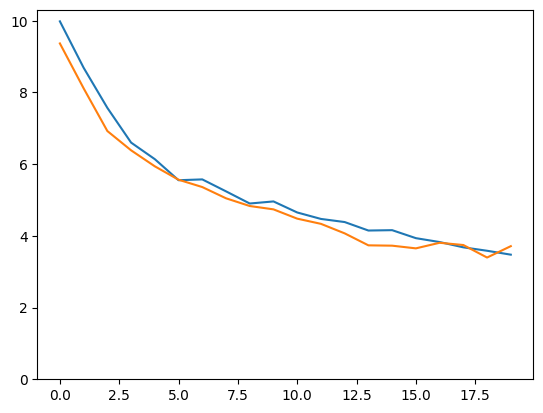

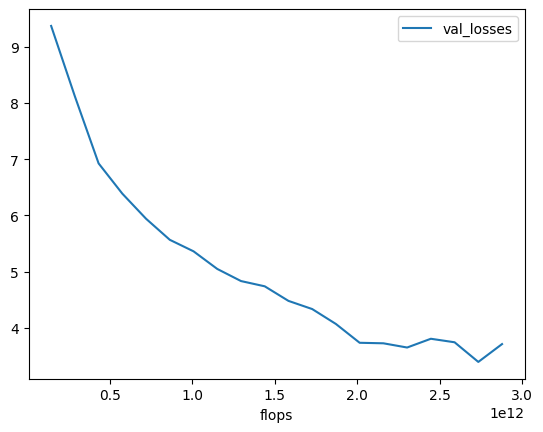

In [27]:
import pandas as pd

df = pd.DataFrame(metrics_basic_Shakespeare)
df['train_losses'].plot(ylim = 0)
df['val_losses'].plot(ylim=0)
df.plot(x = 'flops', y='val_losses')

## Big Model

In [28]:
class BigModel(torch.nn.Module):
    def __init__(self, big=False):
        super(BigModel, self).__init__()
        self.embedding = torch.nn.Embedding(vocab_size, new_emb_size if big else emb_size)
        self.pe = PositionalEncoding(d_model= new_emb_size if big else emb_size)
        self.block1 = Block(big=big)
        self.block2 = Block(big=big)
        self.block3 = Block(big=big)
        self.block4 = Block(big=big)
        self.block5 = Block(big=big)
        self.block6 = Block(big=big)
        self.block7 = Block(big=big)
        self.block8 = Block(big=big)
        self.f_lin = torch.nn.Linear(new_emb_size if big else emb_size, vocab_size)
        self.drop = torch.nn.Dropout(0.1)
    def forward(self, inp):
        e = self.embedding(inp)
        e = self.pe(e)
        m = self.block1(e)
        m = self.block2(m)
        m = self.block3(m)
        m = self.block4(m)
        m = self.block5(m)
        m = self.block6(m)
        m = self.block7(m)
        m = self.block8(m)
        r = self.f_lin(self.drop(m))
        return r

## Fused transformer Architecture

In [29]:
k_params = torch.empty((0,emb_size*emb_size)).to(device)
q_params = torch.empty((0,emb_size*emb_size)).to(device)
v_params = torch.empty((0,emb_size*emb_size)).to(device)
lin_params = torch.empty((0, 2*emb_size*emb_size)).to(device)
ffn_w_params = torch.empty((0, emb_size*emb_size)).to(device)
ffn_b_params = torch.empty((0, emb_size)).to(device)
l_norm_w_params = torch.empty((0, emb_size)).to(device)
l_norm_b_params = torch.empty((0, emb_size)).to(device)
for i in model.state_dict():
    if '.k.' in i:
        k_params = torch.cat((k_params, model.state_dict()[i].flatten().view(1,-1)), dim=0)
    elif '.q.' in i:
        q_params = torch.cat((q_params, model.state_dict()[i].flatten().view(1,-1)), dim=0)
    elif '.v.' in i:
        v_params = torch.cat((v_params, model.state_dict()[i].flatten().view(1,-1)), dim=0)
    elif '.mh_lin' in i:
        lin_params = torch.cat((lin_params, model.state_dict()[i].flatten().view(1,-1)), dim = 0)
    elif 'ffn' in i and 'weight' in i:
        ffn_w_params = torch.cat((ffn_w_params, model.state_dict()[i].flatten().view(1,-1)), dim = 0)
    elif 'ffn' in i and 'bias' in i:
        ffn_b_params = torch.cat((ffn_b_params, model.state_dict()[i].flatten().view(1,-1)), dim = 0)
    elif 'l_norm' in i and 'weight' in i:
        l_norm_w_params = torch.cat((l_norm_w_params, model.state_dict()[i].flatten().view(1,-1)), dim = 0)
    elif 'l_norm' in i and 'bias' in i:
        l_norm_b_params = torch.cat((l_norm_b_params, model.state_dict()[i].flatten().view(1,-1)), dim = 0)


In [30]:
class FusedEmbedding(torch.nn.Module):
    def __init__(self, emb_params, static=True, width=False, width_static=True):
        super(FusedEmbedding, self).__init__()
        self.static = static
        self.width_static = width_static
        self.width=width
        if static:
            if width:
                if width_static:
                    self.emb_params = torch.cat((emb_params, emb_params)).view(vocab_size, -1)
                else:
                    self.emb_params = emb_params.view(vocab_size, -1)
                    self.width_w = torch.nn.Linear(emb_size, new_emb_size, bias=False)
            else:
                self.emb_params = emb_params.view(vocab_size, -1)
        else:
            self.width = width
            self.emb_params = emb_params
    def forward(self, inp):
        emb = self.emb_params
        if self.static:
            if self.width:
                if self.width_static:
                    return torch.nn.functional.embedding(inp, emb)
                return torch.nn.functional.embedding(inp, self.width_w(emb))
        emb = emb.view(vocab_size, -1)
        return torch.nn.functional.embedding(inp, emb)

In [31]:
class FusedLin(torch.nn.Module):
    def __init__(self, num_layers, in_dim, out_dim, small_params_w, small_params_b = None, static = False, width_static=True, width=False, old_in_dim = emb_size, old_out_dim = emb_size):
        super( FusedLin, self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.static = static
        self.width = width
        self.old_in_dim = old_in_dim
        self.old_out_dim = old_out_dim
        self.width_static = width_static
        self.final = True if out_dim == vocab_size else False
        if not self.final and static:
            if width:
                if width_static:
                    self.register_buffer('small_params_w', torch.kron(torch.eye(int(out_dim/old_out_dim), int(in_dim/old_in_dim)).to(device), small_params_w).view(out_dim, in_dim))
                    if small_params_b is not None:
                        if old_out_dim == out_dim:
                            self.register_buffer('small_params_b', small_params_b)
                        else:
                            self.register_buffer('small_params_b', torch.cat((small_params_b, small_params_b)))
                    else:
                        self.small_params_b = None
                else:
                    self.register_buffer('small_params_w', small_params_w)
                    self.width_wa = torch.nn.Linear(old_out_dim, out_dim, bias=False) if width else None
                    self.width_wb = torch.nn.Linear(old_in_dim, in_dim, bias=False) if width else None
                    if small_params_b is not None:
                        self.register_buffer('small_params_b', small_params_b)
                    else:
                        self.small_params_b = None
                    self.width_b = torch.nn.Linear(old_out_dim, out_dim, bias=False) if width and small_params_b is not None else None
            else:
                self.register_buffer('small_params_w', small_params_w.view(out_dim, in_dim))
                if small_params_b is not None:
                    self.register_buffer('small_params_b', small_params_b)
                else:
                    self.small_params_b = None
        else:
            self.width_wa = torch.nn.Linear(old_out_dim, out_dim, bias=False) if width and not self.final else None
            self.width_wb = torch.nn.Linear(old_in_dim, in_dim, bias=False) if width else None
            self.width_b = torch.nn.Linear(old_out_dim, out_dim, bias=False) if width and small_params_b is not None and not self.final else None
            if not self.final:
                self.lin_w = torch.nn.Parameter(torch.rand(num_layers))
                if small_params_b is not None:
                    self.lin_b = torch.nn.Parameter(torch.rand(num_layers))
            self.register_buffer('small_params_w', small_params_w)
            if small_params_b is not None:
                self.register_buffer('small_params_b', small_params_b)
            else:
                self.small_params_b = None
    def forward(self, inp):
        if self.static and not self.final:
            weight=self.small_params_w
            bias=self.small_params_b
            if not self.width_static:
                weight = self.width_wb(weight.view(self.old_out_dim, self.old_in_dim))
                weight = self.width_wa(weight.T).T
                if bias is not None:
                    bias = self.width_b(bias)
            return torch.nn.functional.linear(inp, weight=weight, bias=bias)
        if self.final:
            weight = self.small_params_w
            bias = self.small_params_b
        else:
            weight = self.small_params_w.T @ self.lin_w
            bias = None
            if self.small_params_b is not None:
                bias = self.small_params_b.T@self.lin_b
        if self.width:
            if not self.final:
                weight = self.width_wb(weight.view(self.old_out_dim, self.old_in_dim))
                weight = self.width_wa(weight.T).T
            else:
                weight = self.width_wb(weight.view(self.old_out_dim, self.old_in_dim))
        if self.width_b is not None:
            bias = self.width_b(bias)
        weight = weight.view(self.out_dim, self.in_dim)
        return torch.nn.functional.linear(inp, weight, bias = bias)

In [32]:
class FusedNorm(torch.nn.Module):
    def __init__(self, num_layers, small_params_w, small_params_b, static=False, width_static = True, width=False):
        super(FusedNorm, self).__init__()
        self.static = static
        self.width = width
        self.width_static = width_static
        if not static:
            self.register_buffer('small_params_w', small_params_w)
            self.register_buffer('small_params_b', small_params_b)
            self.lin_w = torch.nn.Parameter(torch.randn(num_layers))
            self.lin_b = torch.nn.Parameter(torch.randn(num_layers))
            if width:
                self.width_w = torch.nn.Linear(emb_size, new_emb_size, bias=False)
                self.width_b = torch.nn.Linear(emb_size, new_emb_size, bias=False)
        else:
            if width:
                if width_static:
                    self.register_buffer('small_params_w', torch.cat((small_params_w, small_params_w)))
                    self.register_buffer('small_params_b', torch.cat((small_params_b, small_params_b)))
                else:
                    self.register_buffer('small_params_w', small_params_w)
                    self.register_buffer('small_params_b', small_params_b)
                    self.width_w = torch.nn.Linear(emb_size, new_emb_size, bias=False)
                    self.width_b = torch.nn.Linear(emb_size, new_emb_size, bias=False)
            else:
                self.register_buffer('small_params_w', small_params_w)
                self.register_buffer('small_params_b', small_params_b)
    def forward(self, inp):
        if self.static:
            weight = self.small_params_w
            bias = self.small_params_b
            e_s = emb_size if not self.width else new_emb_size
            if not self.width_static:
                weight = self.width_w(weight)
                bias = self.width_b(bias)
            return torch.nn.functional.layer_norm(inp, tuple([e_s]), weight=weight, bias=bias)
        weight = self.small_params_w.T @ self.lin_w
        bias = self.small_params_b.T @ self.lin_b
        if self.width:
            weight = self.width_w(weight)
            bias = self.width_b(bias)
        e_s = emb_size if not self.width else new_emb_size
        return torch.nn.functional.layer_norm(inp, tuple([e_s]), weight=weight, bias=bias)


In [33]:
class FusedAttentionHead(torch.nn.Module):
    def __init__(self, static=False, layerNum=None, width=False, width_static = True):
        super( FusedAttentionHead, self).__init__()
        self.static = static
        self.width_static = width_static
        if not static:
            self.k = FusedLin(num_small_layers*multi_heads, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, k_params, width=width, width_static=width_static)
            self.q = FusedLin(num_small_layers*multi_heads, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, q_params, width=width, width_static=width_static)
            self.v = FusedLin(num_small_layers*multi_heads, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, v_params, width=width, width_static=width_static)
        else:
            self.k = FusedLin(num_small_layers*multi_heads, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, k_params[layerNum], static=True, width=width, width_static=width_static)
            self.q = FusedLin(num_small_layers*multi_heads, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, q_params[layerNum], static=True, width=width, width_static=width_static)
            self.v = FusedLin(num_small_layers*multi_heads, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, v_params[layerNum], static=True, width=width, width_static=width_static)
        self.register_buffer('tril', torch.tril(torch.ones(block_size,block_size)))
    def forward(self, e):
        keys = self.k(e)
        queries = self.q(e)
        values = self.v(e)
        ret = keys @ queries.transpose(1, 2)*(1.0/math.sqrt(keys.size(-1)))
        ret = torch.masked_fill(ret, self.tril==0, -torch.inf)
        ret = torch.softmax(ret, 2)
        ret = ret @ values
        return ret

In [34]:
class FusedMultiHead(torch.nn.Module):
    def __init__(self, static=False, layerNum=None, width=False, width_static = True):
        super( FusedMultiHead, self).__init__()
        self.drop = torch.nn.Dropout(0.1)
        self.width_static = width_static
        if not static:
            self.head1 = FusedAttentionHead(width=width, width_static=width_static)
            self.head2 = FusedAttentionHead(width=width, width_static=width_static)
            self.mh_lin = FusedLin(num_small_layers, multi_heads*(emb_size if not width else new_emb_size), emb_size if not width else new_emb_size, lin_params, width=width, old_in_dim=multi_heads*emb_size , old_out_dim=emb_size, width_static=width_static)
        else:
            self.head1 = FusedAttentionHead(static=True, layerNum=2*layerNum, width=width, width_static=width_static)
            self.head2 = FusedAttentionHead(static=True, layerNum=2*layerNum+1, width=width, width_static=width_static)
            self.mh_lin = FusedLin(num_small_layers, multi_heads*(emb_size if not width else new_emb_size), emb_size if not width else new_emb_size, lin_params[layerNum], static=True, width=width, width_static=width_static, old_in_dim=multi_heads*emb_size, old_out_dim=emb_size)
    def forward(self, inp):
        x1 = self.head1(inp)
        x2 = self.head2(inp)
        return self.mh_lin(self.drop(torch.cat([x1,x2], dim=2))).relu()

In [35]:
class FusedBlock(torch.nn.Module):
    def __init__(self, static=False, layerNum=None, width=False, width_static = True):
        super(FusedBlock, self).__init__()
        self.static = static
        self.width_static = width_static
        self.drop = torch.nn.Dropout(0.1)
        if not static:
            self.multiHead = FusedMultiHead(width=width, width_static=width_static)
            self.norm_1 = FusedNorm(num_small_layers*2, l_norm_w_params, l_norm_b_params, width=width, width_static=width_static)
            self.norm_2 = FusedNorm(num_small_layers*2, l_norm_w_params, l_norm_b_params, width=width, width_static=width_static)
            self.ffn = FusedLin(num_small_layers, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, ffn_w_params, ffn_b_params, width=width, width_static=width_static)
        else:
            self.multiHead = FusedMultiHead(static=True, layerNum=layerNum, width=width, width_static=width_static)
            self.norm_1 = FusedNorm(num_small_layers*2, l_norm_w_params[layerNum*2], l_norm_b_params[layerNum*2], static=True, width=width, width_static=width_static)
            self.norm_2 = FusedNorm(num_small_layers*2, l_norm_w_params[layerNum*2+1], l_norm_b_params[layerNum*2+1], static=True, width=width, width_static=width_static)
            self.ffn = FusedLin(num_small_layers, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, ffn_w_params[layerNum], ffn_b_params[layerNum], static=True, width=width, width_static=width_static)
    def forward(self, inp):
        m = self.norm_1(inp + self.multiHead(inp))
        m = self.norm_2(m + self.ffn(self.drop(m)).relu())
        return m


## LiGO & CrossLiGO

In [36]:
class StackLiGO(torch.nn.Module):
    def __init__(self, width=False) -> None:
        super(StackLiGO, self).__init__()
        self.emb = FusedEmbedding(emb_params=model.embedding.weight.flatten().clone(), width=width, static=True)
        self.pe = PositionalEncoding(d_model=new_emb_size if width else emb_size)
        self.block1 = FusedBlock(static=True, layerNum=0, width=width)
        self.block2 = FusedBlock(static=True, layerNum=1, width=width)
        self.block3 = FusedBlock(static=True, layerNum=2, width=width)
        self.block4 = FusedBlock(static=True, layerNum=3, width=width)
        self.block5 = FusedBlock(width=width)
        self.block6 = FusedBlock(width=width)
        self.block7 = FusedBlock(width=width)
        self.block8 = FusedBlock(width=width)
        self.drop = torch.nn.Dropout(0.1)
        self.f_lin = FusedLin(1, in_dim=emb_size if not width else new_emb_size, out_dim=vocab_size, static=True, small_params_w= model.f_lin.weight.flatten().clone(), small_params_b=model.f_lin.bias.clone(), width=width, old_in_dim=emb_size, old_out_dim=vocab_size)
    def forward(self, inp):
        e = self.emb(inp)
        e = self.pe(e)
        m = self.block1(e)
        m = self.block2(m)
        m = self.block3(m)
        m = self.block4(m)
        m = self.block5(m)
        m = self.block6(m)
        m = self.block7(m)
        m = self.block8(m)
        return self.f_lin(self.drop(m))

In [37]:
class StackLiGOv2(torch.nn.Module):
    def __init__(self, width=False) -> None:
        super(StackLiGOv2, self).__init__()
        self.emb = FusedEmbedding(emb_params=model.embedding.weight.flatten().clone(), width=width, static=True, width_static=False)
        self.pe = PositionalEncoding(d_model=new_emb_size if width else emb_size)
        self.block1 = FusedBlock(static=True, layerNum=0, width=width, width_static=False)
        self.block2 = FusedBlock(static=True, layerNum=1, width=width, width_static=False)
        self.block3 = FusedBlock(static=True, layerNum=2, width=width, width_static=False)
        self.block4 = FusedBlock(static=True, layerNum=3, width=width, width_static=False)
        self.block5 = FusedBlock(width=width)
        self.block6 = FusedBlock(width=width)
        self.block7 = FusedBlock(width=width)
        self.block8 = FusedBlock(width=width)
        self.drop = torch.nn.Dropout(0.1)
        self.f_lin = FusedLin(1, in_dim=emb_size if not width else new_emb_size, out_dim=vocab_size, static=True, small_params_w= model.f_lin.weight.flatten().clone(), small_params_b=model.f_lin.bias.clone(), width=width, old_in_dim=emb_size, old_out_dim=vocab_size)
    def forward(self, inp):
        e = self.emb(inp)
        e = self.pe(e)
        m = self.block1(e)
        m = self.block2(m)
        m = self.block3(m)
        m = self.block4(m)
        m = self.block5(m)
        m = self.block6(m)
        m = self.block7(m)
        m = self.block8(m)
        return self.f_lin(self.drop(m))

In [38]:
class LiGO(torch.nn.Module):
    def __init__(self, width=False) -> None:
        super(LiGO, self).__init__()
        self.emb = FusedEmbedding(emb_params=model.embedding.weight.flatten().clone(), width=width, static=True, width_static=False)
        self.pe = PositionalEncoding(d_model=new_emb_size if width else emb_size)
        self.block1 = FusedBlock(width=width, width_static=False)
        self.block2 = FusedBlock(width=width, width_static=False)
        self.block3 = FusedBlock(width=width, width_static=False)
        self.block4 = FusedBlock(width=width, width_static=False)
        self.block5 = FusedBlock(width=width, width_static=False)
        self.block6 = FusedBlock(width=width, width_static=False)
        self.block7 = FusedBlock(width=width, width_static=False)
        self.block8 = FusedBlock(width=width, width_static=False)
        self.drop = torch.nn.Dropout(0.1)
        self.f_lin = FusedLin(1, in_dim=emb_size if not width else new_emb_size, out_dim=vocab_size, static=True, small_params_w= model.f_lin.weight.flatten().clone(), small_params_b=model.f_lin.bias.clone(), width=width, old_in_dim=emb_size, old_out_dim=vocab_size)
    def forward(self, inp):
        e = self.emb(inp)
        e = self.pe(e)
        m = self.block1(e)
        m = self.block2(m)
        m = self.block3(m)
        m = self.block4(m)
        m = self.block5(m)
        m = self.block6(m)
        m = self.block7(m)
        m = self.block8(m)
        return self.f_lin(self.drop(m))

In [39]:
class CrossLiGO(torch.nn.Module):
    def __init__(self, width=False) -> None:
        super(CrossLiGO, self).__init__()
        self.emb = FusedEmbedding(emb_params=model.embedding.weight.flatten().detach().clone(), width=width, static=True, width_static=False)
        self.pe = PositionalEncoding(d_model=new_emb_size if width else emb_size)
        self.block1 = FusedBlock(static=True, layerNum=0, width=width)
        self.block3 = FusedBlock(static=True, layerNum=1, width=width)
        self.block5 = FusedBlock(static=True, layerNum=2, width=width)
        self.block7 = FusedBlock(static=True, layerNum=3, width=width)
        self.block2 = FusedBlock(width=width, width_static=False)
        self.block4 = FusedBlock(width=width, width_static=False)
        self.block6 = FusedBlock(width=width, width_static=False)
        self.block8 = FusedBlock(width=width, width_static=False)
        self.drop = torch.nn.Dropout(0.1)
        self.f_lin = FusedLin(1, in_dim=emb_size if not width else new_emb_size, out_dim=vocab_size, static=True, small_params_w= model.f_lin.weight.flatten().clone().to(device), small_params_b=model.f_lin.bias.detach().clone().to(device), width=width, old_in_dim=emb_size, old_out_dim=vocab_size)
    def forward(self, inp):
        e = self.emb(inp)
        e = self.pe(e)
        m = self.block1(e)
        m = self.block2(m)
        m = self.block3(m)
        m = self.block4(m)
        m = self.block5(m)
        m = self.block6(m)
        m = self.block7(m)
        m = self.block8(m)
        return self.f_lin(self.drop(m))


In [40]:
class LiGO_W(torch.nn.Module):
    def __init__(self, width=True) -> None:
        super(LiGO_W, self).__init__()
        self.emb = FusedEmbedding(emb_params=model.embedding.weight.flatten(), width=width, static=True, width_static=False)
        self.pe = PositionalEncoding(d_model=new_emb_size if width else emb_size)
        self.block1 = FusedBlock(width=width, static=True, layerNum=0, width_static=False)
        self.block2 = FusedBlock(width=width, static=True, layerNum=1, width_static=False)
        self.block3 = FusedBlock(width=width, static=True, layerNum=2, width_static=False)
        self.block4 = FusedBlock(width=width, static=True, layerNum=3, width_static=False)
        self.drop = torch.nn.Dropout(0.1)
        self.f_lin = FusedLin(1, in_dim=emb_size if not width else new_emb_size, out_dim=vocab_size, static=True, small_params_w= model.f_lin.weight.flatten(), small_params_b=model.f_lin.bias, width=width, old_in_dim=emb_size, old_out_dim=vocab_size)
    def forward(self, inp):
        e = self.emb(inp)
        e = self.pe(e)
        m = self.block1(e)
        m = self.block2(m)
        m = self.block3(m)
        m = self.block4(m)
        return self.f_lin(self.drop(m))


In [41]:
@torch.no_grad()
def initLiGO(stackLiGO, bigModel):
    # Embedding layer
    emb = stackLiGO.emb.emb_params
    if stackLiGO.emb.width and not stackLiGO.emb.width_static:
        emb = stackLiGO.emb.width_w(emb)
    setattr(bigModel.embedding, 'weight', torch.nn.Parameter(emb, requires_grad=True).to(device))
    # Final Linear layer
    f_lin_w = stackLiGO.f_lin.small_params_w.view(vocab_size, -1)
    f_lin_b = stackLiGO.f_lin.small_params_b
    if stackLiGO.f_lin.width:
        f_lin_w = (stackLiGO.f_lin.width_wb(f_lin_w))
        # f_lin_w = (stackLiGO.f_lin.width_wa(f_lin_w.T)).T     Issues with big vocab size
        # f_lin_b = stackLiGO.f_lin.width_b.weight@f_lin_b
    setattr(bigModel.f_lin, 'weight', torch.nn.Parameter(f_lin_w.view(vocab_size, -1), requires_grad=True).to(device))
    setattr(bigModel.f_lin, 'bias', torch.nn.Parameter(f_lin_b, requires_grad=True).to(device))
    num_layers = num_large_layers if type(stackLiGO) is not LiGO_W else num_small_layers
    for i in range(1, num_layers+1):
        fused_block = getattr(stackLiGO, f'block{i}')
        big_block = getattr(bigModel, f'block{i}')
        # Setting FFN Weights
        if fused_block.ffn.static:
            if fused_block.ffn.width:
                if fused_block.ffn.width_static:
                    fb_w = fused_block.ffn.small_params_w.view(new_emb_size, new_emb_size)
                    fb_b = fused_block.ffn.small_params_b
                else:
                    fb_w = fused_block.ffn.small_params_w.view(emb_size, emb_size)
                    fb_b = fused_block.ffn.small_params_b
                    fb_w = fused_block.ffn.width_wb(fb_w)
                    fb_w = fused_block.ffn.width_wa(fb_w.T).T
                    fb_b = fused_block.ffn.width_b.weight@fb_b
            else:
                fb_w = fused_block.ffn.small_params_w.view(emb_size, emb_size)
                fb_b = fused_block.ffn.small_params_b
        else:
            fb_w = (ffn_w_params.T@fused_block.ffn.lin_w).view(emb_size, emb_size)
            fb_b = (ffn_b_params.T@fused_block.ffn.lin_b)
            if fused_block.ffn.width:
                fb_w = fused_block.ffn.width_wb(fb_w)
                fb_w = fused_block.ffn.width_wa(fb_w.T).T
                fb_b = fused_block.ffn.width_b.weight@fb_b
        setattr(big_block.ffn, 'weight', torch.nn.Parameter(fb_w, requires_grad=True).to(device))
        setattr(big_block.ffn, 'bias', torch.nn.Parameter(fb_b, requires_grad=True).to(device))
        # Setting Norm Layers
        if fused_block.static:
            n_w_1 = fused_block.norm_1.small_params_w
            n_b_1 = fused_block.norm_1.small_params_b
            n_w_2 = fused_block.norm_2.small_params_w
            n_b_2 = fused_block.norm_2.small_params_b
            if not fused_block.width_static:
                n_w_1 = fused_block.norm_1.width_w.weight@n_w_1
                n_b_1 = fused_block.norm_1.width_b.weight@n_b_1
                n_w_2 = fused_block.norm_2.width_w.weight@n_w_2
                n_b_2 = fused_block.norm_2.width_b.weight@n_b_2
        else:
            n_w_1 = (l_norm_w_params.T@fused_block.norm_1.lin_w)
            n_b_1 = (l_norm_b_params.T@fused_block.norm_1.lin_b)
            n_w_2 = (l_norm_w_params.T@fused_block.norm_2.lin_w)
            n_b_2 = (l_norm_b_params.T@fused_block.norm_2.lin_b)
            if fused_block.norm_1.width:
                n_w_1 = fused_block.norm_1.width_w.weight@n_w_1
                n_b_1 = fused_block.norm_1.width_b.weight@n_b_1
                n_w_2 = fused_block.norm_2.width_w.weight@n_w_2
                n_b_2 = fused_block.norm_2.width_b.weight@n_b_2
        setattr(big_block.l_norm_1, 'weight', torch.nn.Parameter(n_w_1, requires_grad=True).to(device))
        setattr(big_block.l_norm_1, 'bias', torch.nn.Parameter(n_b_1, requires_grad=True).to(device))
        setattr(big_block.l_norm_2, 'weight', torch.nn.Parameter(n_w_2, requires_grad=True).to(device))
        setattr(big_block.l_norm_2, 'bias', torch.nn.Parameter(n_b_2, requires_grad=True).to(device))
        # Setting Multi-Head Attention
        if fused_block.static:
            mh = fused_block.multiHead.mh_lin.small_params_w
            if not fused_block.width_static:
                mh = fused_block.multiHead.mh_lin.width_wb(mh.view(emb_size, multi_heads*emb_size))
                mh = fused_block.multiHead.mh_lin.width_wa(mh.T).T
        else:
            mh = (lin_params.T@fused_block.multiHead.mh_lin.lin_w).view(emb_size, emb_size*multi_heads)
            if fused_block.multiHead.mh_lin.width:
                mh = fused_block.multiHead.mh_lin.width_wb(mh)
                mh = fused_block.multiHead.mh_lin.width_wa(mh.T).T
        setattr(big_block.multihead.mh_lin, 'weight', torch.nn.Parameter(mh, requires_grad=True))
        for h in range(1, multi_heads+1):
            head = getattr(big_block.multihead, f'head{h}')
            fused_head = getattr(fused_block.multiHead, f'head{h}')
            if fused_head.static:
                k = fused_head.k.small_params_w
                q = fused_head.q.small_params_w
                v = fused_head.v.small_params_w
                if not fused_block.width_static:
                    k = fused_head.k.width_wb(k.view(emb_size, emb_size))
                    k = fused_head.k.width_wa(k.T).T
                    q = fused_head.q.width_wb(q.view(emb_size, emb_size))
                    q = fused_head.q.width_wa(q.T).T
                    v = fused_head.v.width_wb(v.view(emb_size, emb_size))
                    v = fused_head.v.width_wa(v.T).T
            else:
                k = (k_params.T@fused_head.k.lin_w).view(emb_size, emb_size)
                q = (q_params.T@fused_head.q.lin_w).view(emb_size, emb_size)
                v = (v_params.T@fused_head.v.lin_w).view(emb_size, emb_size)
                if fused_head.k.width:
                    k = fused_head.k.width_wb(k)
                    k = fused_head.k.width_wa(k.T).T
                    q = fused_head.q.width_wb(q)
                    q = fused_head.q.width_wa(q.T).T
                    v = fused_head.v.width_wb(v)
                    v = fused_head.v.width_wa(v.T).T
            setattr(head.k, 'weight', torch.nn.Parameter(k, requires_grad=True).to(device))
            setattr(head.q, 'weight', torch.nn.Parameter(q, requires_grad=True).to(device))
            setattr(head.v, 'weight', torch.nn.Parameter(v, requires_grad=True).to(device))

## Comparative study models

### Scratch

In [42]:
bigModel_scratch = BigModel(big=True).to(device)
optim_sb = torch.optim.Adam(params=bigModel_scratch.parameters(), lr=1e-3)
scratch_depth_width = train(bigModel_scratch, optim_sb, 20)

Epoch 1, Train Loss: 8.9341, Val Loss: 7.3485
Epoch 2, Train Loss: 6.7372, Val Loss: 6.2559
Epoch 3, Train Loss: 5.7113, Val Loss: 5.3523
Epoch 4, Train Loss: 5.1131, Val Loss: 5.0075
Epoch 5, Train Loss: 4.9312, Val Loss: 4.4135
Epoch 6, Train Loss: 4.4930, Val Loss: 4.2913
Epoch 7, Train Loss: 4.0435, Val Loss: 4.0088
Epoch 8, Train Loss: 4.0568, Val Loss: 3.9303
Epoch 9, Train Loss: 3.9675, Val Loss: 3.6567
Epoch 10, Train Loss: 3.7544, Val Loss: 3.9228
Epoch 11, Train Loss: 3.5519, Val Loss: 3.1915
Epoch 12, Train Loss: 3.3210, Val Loss: 3.2065
Epoch 13, Train Loss: 3.2594, Val Loss: 2.8786
Epoch 14, Train Loss: 3.1519, Val Loss: 2.8360
Epoch 15, Train Loss: 2.9161, Val Loss: 3.0405
Epoch 16, Train Loss: 2.8702, Val Loss: 2.4885
Epoch 17, Train Loss: 2.6795, Val Loss: 2.7289
Epoch 18, Train Loss: 2.8210, Val Loss: 2.6515
Epoch 19, Train Loss: 2.7995, Val Loss: 2.2726
Epoch 20, Train Loss: 2.4884, Val Loss: 2.2561


<Axes: >

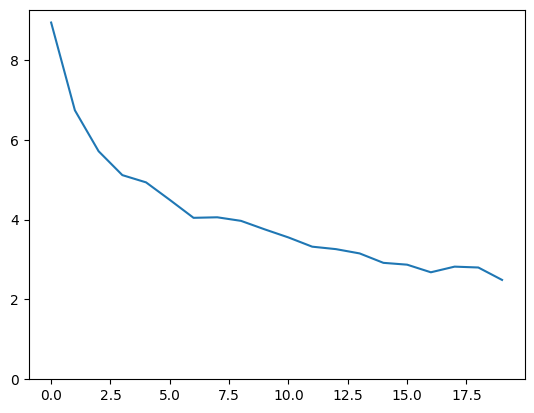

In [43]:
big_model_metrics = pd.DataFrame(scratch_depth_width)
big_model_metrics['train_losses'].plot(ylim = 0)

## Stacking

In [44]:
import torch.nn as nn

class StackedModel(nn.Module):
    def __init__(self, pretrained_model):
        super(StackedModel, self).__init__()

        # Use pretrained model's components
        self.embedding = pretrained_model.embedding
        self.pe = pretrained_model.pe
        self.f_lin = pretrained_model.f_lin
        self.drop = pretrained_model.drop

        # Add pretrained blocks (1-4)
        self.blocks = nn.ModuleList(pretrained_model.blocks)

        # Add additional blocks according to the pattern: 5-1, 6-2, 7-3, 8-4
        # Block 5 -> Block 1, Block 6 -> Block 2, Block 7 -> Block 3, Block 8 -> Block 4
        self.blocks.append(pretrained_model.blocks[0])  # Block 5
        self.blocks.append(pretrained_model.blocks[1])  # Block 6
        self.blocks.append(pretrained_model.blocks[2])  # Block 7
        self.blocks.append(pretrained_model.blocks[3])  # Block 8

    def forward(self, inp):
        e = self.embedding(inp)
        e = self.pe(e)

        # Pass input through all blocks sequentially
        for block in self.blocks:
            e = block(e)

        r = self.f_lin(self.drop(e))
        return r

In [45]:
stacked_model = StackedModel(model)
optim_stacked = torch.optim.Adam(params=stacked_model.parameters(), lr=1e-2)
stacked_metrics = train(stacked_model, optim_stacked, 20)

Epoch 1, Train Loss: 8.7269, Val Loss: 8.1926
Epoch 2, Train Loss: 8.3694, Val Loss: 8.4018
Epoch 3, Train Loss: 8.3594, Val Loss: 8.0517
Epoch 4, Train Loss: 8.0407, Val Loss: 8.1395
Epoch 5, Train Loss: 8.0493, Val Loss: 7.7919
Epoch 6, Train Loss: 7.8875, Val Loss: 7.9714
Epoch 7, Train Loss: 7.7371, Val Loss: 7.7249
Epoch 8, Train Loss: 7.7677, Val Loss: 7.6653
Epoch 9, Train Loss: 7.6840, Val Loss: 7.9256
Epoch 10, Train Loss: 7.7357, Val Loss: 7.6953
Epoch 11, Train Loss: 7.8584, Val Loss: 7.5205
Epoch 12, Train Loss: 7.6716, Val Loss: 7.6650
Epoch 13, Train Loss: 7.7967, Val Loss: 7.5291
Epoch 14, Train Loss: 7.7118, Val Loss: 7.5195
Epoch 15, Train Loss: 7.6410, Val Loss: 7.7012
Epoch 16, Train Loss: 7.7412, Val Loss: 7.7987
Epoch 17, Train Loss: 7.7020, Val Loss: 7.5188
Epoch 18, Train Loss: 7.7039, Val Loss: 7.4702
Epoch 19, Train Loss: 7.7853, Val Loss: 7.5641
Epoch 20, Train Loss: 7.6080, Val Loss: 7.5094


### LiGO Depth only

In [46]:
LiGO_d = LiGO(width=False).to(device)
optim_ld = torch.optim.Adam(params=LiGO_d.parameters(), lr=1e-2)
_=train(LiGO_d, optim_ld, 20)

Epoch 1, Train Loss: 16.8983, Val Loss: 11.3367
Epoch 2, Train Loss: 9.4764, Val Loss: 8.0120
Epoch 3, Train Loss: 7.2375, Val Loss: 6.2435
Epoch 4, Train Loss: 6.1127, Val Loss: 5.9134
Epoch 5, Train Loss: 5.7158, Val Loss: 5.6485
Epoch 6, Train Loss: 5.3385, Val Loss: 5.1240
Epoch 7, Train Loss: 5.1927, Val Loss: 4.7211
Epoch 8, Train Loss: 4.9452, Val Loss: 4.9620
Epoch 9, Train Loss: 4.8754, Val Loss: 4.9455
Epoch 10, Train Loss: 4.8119, Val Loss: 5.0181
Epoch 11, Train Loss: 4.7037, Val Loss: 4.8663
Epoch 12, Train Loss: 4.4743, Val Loss: 4.6059
Epoch 13, Train Loss: 4.6380, Val Loss: 4.6626
Epoch 14, Train Loss: 4.4646, Val Loss: 4.6472
Epoch 15, Train Loss: 4.5037, Val Loss: 4.7199
Epoch 16, Train Loss: 4.4937, Val Loss: 4.2244
Epoch 17, Train Loss: 4.5122, Val Loss: 4.2893
Epoch 18, Train Loss: 4.4782, Val Loss: 4.3172
Epoch 19, Train Loss: 4.4773, Val Loss: 4.7724
Epoch 20, Train Loss: 4.3443, Val Loss: 4.2745


In [47]:
bigModel = BigModel(big=False).to(device)
initLiGO(LiGO_d, bigModel)
optim_b = torch.optim.Adam(params=bigModel.parameters(), lr=1e-3)
ligo_depth_metrics = train(bigModel, optim_b, 20)

Epoch 1, Train Loss: 4.2950, Val Loss: 4.1207
Epoch 2, Train Loss: 3.8729, Val Loss: 3.7310
Epoch 3, Train Loss: 3.9121, Val Loss: 3.6481
Epoch 4, Train Loss: 3.7257, Val Loss: 3.4083
Epoch 5, Train Loss: 3.6233, Val Loss: 3.3097
Epoch 6, Train Loss: 3.4877, Val Loss: 3.5951
Epoch 7, Train Loss: 3.5041, Val Loss: 3.2974
Epoch 8, Train Loss: 3.3746, Val Loss: 3.5107
Epoch 9, Train Loss: 3.1795, Val Loss: 3.3359
Epoch 10, Train Loss: 3.1545, Val Loss: 2.9048
Epoch 11, Train Loss: 3.0829, Val Loss: 2.7272
Epoch 12, Train Loss: 3.0756, Val Loss: 2.8471
Epoch 13, Train Loss: 2.9902, Val Loss: 3.0994
Epoch 14, Train Loss: 2.9303, Val Loss: 2.6971
Epoch 15, Train Loss: 2.8325, Val Loss: 2.5813
Epoch 16, Train Loss: 2.6776, Val Loss: 2.4865
Epoch 17, Train Loss: 2.5106, Val Loss: 2.9532
Epoch 18, Train Loss: 2.6826, Val Loss: 2.6907
Epoch 19, Train Loss: 2.7166, Val Loss: 2.5709
Epoch 20, Train Loss: 2.5613, Val Loss: 2.6415


### CrossLiGO depth only

In [48]:
cl_d = CrossLiGO(width=False).to(device)
optim_ldw = torch.optim.Adam(cl_d.parameters(), lr=1e-2)
_=train(cl_d, optim_ldw, 20)

Epoch 1, Train Loss: 25.3406, Val Loss: 21.7212
Epoch 2, Train Loss: 20.7831, Val Loss: 18.6160
Epoch 3, Train Loss: 17.2909, Val Loss: 15.5872
Epoch 4, Train Loss: 14.2832, Val Loss: 13.2941
Epoch 5, Train Loss: 12.5808, Val Loss: 10.8887
Epoch 6, Train Loss: 10.5145, Val Loss: 8.7912
Epoch 7, Train Loss: 8.4606, Val Loss: 7.7168
Epoch 8, Train Loss: 6.7844, Val Loss: 6.0014
Epoch 9, Train Loss: 5.2414, Val Loss: 4.8992
Epoch 10, Train Loss: 4.8121, Val Loss: 4.7198
Epoch 11, Train Loss: 4.6784, Val Loss: 4.6698
Epoch 12, Train Loss: 4.8521, Val Loss: 4.7481
Epoch 13, Train Loss: 4.6959, Val Loss: 4.3199
Epoch 14, Train Loss: 4.5503, Val Loss: 4.3113
Epoch 15, Train Loss: 4.7916, Val Loss: 4.4982
Epoch 16, Train Loss: 4.5191, Val Loss: 4.2992
Epoch 17, Train Loss: 4.7990, Val Loss: 4.5688
Epoch 18, Train Loss: 4.6540, Val Loss: 4.3727
Epoch 19, Train Loss: 4.4354, Val Loss: 4.5559
Epoch 20, Train Loss: 4.6200, Val Loss: 4.4292


In [49]:
bigModel = BigModel(big=False).to(device)
initLiGO(cl_d, bigModel)
optim_b = torch.optim.Adam(params=bigModel.parameters(), lr=1e-3)
cl_depth_metrics = train(bigModel, optim_b, 20)

Epoch 1, Train Loss: 4.5069, Val Loss: 3.9294
Epoch 2, Train Loss: 4.0987, Val Loss: 4.0112
Epoch 3, Train Loss: 3.9277, Val Loss: 3.7070
Epoch 4, Train Loss: 3.8929, Val Loss: 3.5283
Epoch 5, Train Loss: 3.8973, Val Loss: 3.5786
Epoch 6, Train Loss: 3.6177, Val Loss: 3.2901
Epoch 7, Train Loss: 3.4511, Val Loss: 3.4796
Epoch 8, Train Loss: 3.5082, Val Loss: 3.2108
Epoch 9, Train Loss: 3.4352, Val Loss: 3.1689
Epoch 10, Train Loss: 3.1063, Val Loss: 3.1186
Epoch 11, Train Loss: 3.0632, Val Loss: 3.0795
Epoch 12, Train Loss: 3.3234, Val Loss: 3.3425
Epoch 13, Train Loss: 3.1138, Val Loss: 2.8532
Epoch 14, Train Loss: 3.0239, Val Loss: 2.5873
Epoch 15, Train Loss: 3.0297, Val Loss: 3.0113
Epoch 16, Train Loss: 2.9912, Val Loss: 2.7142
Epoch 17, Train Loss: 2.9449, Val Loss: 3.0917
Epoch 18, Train Loss: 2.7602, Val Loss: 2.4317
Epoch 19, Train Loss: 2.8147, Val Loss: 2.8474
Epoch 20, Train Loss: 2.5896, Val Loss: 2.3750


### StackLiGO depth only

In [50]:
stackLiGOd = StackLiGO(width=False).to(device)
optim_sld = torch.optim.Adam(params=stackLiGOd.parameters(), lr=1e-2)
_=train(stackLiGOd, optim_sld, 20)

Epoch 1, Train Loss: 26.9289, Val Loss: 21.6543
Epoch 2, Train Loss: 16.4749, Val Loss: 8.1510
Epoch 3, Train Loss: 7.7466, Val Loss: 6.9202
Epoch 4, Train Loss: 7.1280, Val Loss: 7.1219
Epoch 5, Train Loss: 6.6600, Val Loss: 6.5554
Epoch 6, Train Loss: 6.6672, Val Loss: 6.3585
Epoch 7, Train Loss: 6.4366, Val Loss: 6.1317
Epoch 8, Train Loss: 6.1836, Val Loss: 5.6089
Epoch 9, Train Loss: 5.7972, Val Loss: 5.4382
Epoch 10, Train Loss: 5.4339, Val Loss: 5.5072
Epoch 11, Train Loss: 5.2544, Val Loss: 4.7975
Epoch 12, Train Loss: 4.9306, Val Loss: 4.7836
Epoch 13, Train Loss: 4.8422, Val Loss: 4.4193
Epoch 14, Train Loss: 4.4735, Val Loss: 4.7109
Epoch 15, Train Loss: 4.3970, Val Loss: 4.2829
Epoch 16, Train Loss: 4.3625, Val Loss: 4.4112
Epoch 17, Train Loss: 4.1944, Val Loss: 3.9940
Epoch 18, Train Loss: 4.2045, Val Loss: 3.8589
Epoch 19, Train Loss: 4.2935, Val Loss: 3.8135
Epoch 20, Train Loss: 4.0754, Val Loss: 3.8507


In [51]:
bigModel = BigModel(big=False).to(device)
initLiGO(stackLiGOd, bigModel)
optim_b = torch.optim.Adam(params=bigModel.parameters(), lr=1e-3)
sl_depth_metrics = train(bigModel, optim_b, 20)

Epoch 1, Train Loss: 3.9845, Val Loss: 3.7383
Epoch 2, Train Loss: 3.7403, Val Loss: 3.3497
Epoch 3, Train Loss: 3.8290, Val Loss: 3.3137
Epoch 4, Train Loss: 3.7016, Val Loss: 3.2276
Epoch 5, Train Loss: 3.5159, Val Loss: 3.2042
Epoch 6, Train Loss: 3.4776, Val Loss: 3.3420
Epoch 7, Train Loss: 3.4821, Val Loss: 3.2225
Epoch 8, Train Loss: 3.1644, Val Loss: 3.3047
Epoch 9, Train Loss: 3.1062, Val Loss: 3.3819
Epoch 10, Train Loss: 3.0819, Val Loss: 3.0510
Epoch 11, Train Loss: 2.9967, Val Loss: 3.0169
Epoch 12, Train Loss: 2.9080, Val Loss: 2.9060
Epoch 13, Train Loss: 2.8945, Val Loss: 2.8500
Epoch 14, Train Loss: 2.9862, Val Loss: 2.6849
Epoch 15, Train Loss: 2.7142, Val Loss: 2.5814
Epoch 16, Train Loss: 2.6457, Val Loss: 2.7515
Epoch 17, Train Loss: 2.7188, Val Loss: 2.5361
Epoch 18, Train Loss: 2.7686, Val Loss: 2.2174
Epoch 19, Train Loss: 2.5897, Val Loss: 2.2925
Epoch 20, Train Loss: 2.5465, Val Loss: 2.4741


# When to grow

## Periodic

0 -> 8

pretrained(4) -> 8

In [52]:
base_model = model.to(device)
periodic_optimizer = torch.optim.Adam(base_model.parameters(), lr = 1e-3)
metrics_pretrained_periodic = periodic_train(base_model, periodic_optimizer, 20, num_blocks=4)

Epoch 1, Train Loss: 10.6452, Val Loss: 9.3820
Epoch 2, Train Loss: 8.9153, Val Loss: 8.3135
Epoch 3, Train Loss: 8.3704, Val Loss: 8.1065
Epoch 4, Train Loss: 8.0744, Val Loss: 8.1845
Adding new block at epoch 4
added successfully
Epoch 5, Train Loss: 8.6855, Val Loss: 8.0963
Epoch 6, Train Loss: 7.9524, Val Loss: 7.7855
Epoch 7, Train Loss: 7.9523, Val Loss: 7.8328
Epoch 8, Train Loss: 7.7238, Val Loss: 7.5747
Adding new block at epoch 8
added successfully
Epoch 9, Train Loss: 7.7985, Val Loss: 7.5484
Epoch 10, Train Loss: 7.7854, Val Loss: 7.7735
Epoch 11, Train Loss: 7.7304, Val Loss: 7.5441
Epoch 12, Train Loss: 7.6952, Val Loss: 7.7108
Adding new block at epoch 12
added successfully
Epoch 13, Train Loss: 7.9762, Val Loss: 8.0245
Epoch 14, Train Loss: 7.6295, Val Loss: 7.5068
Epoch 15, Train Loss: 7.8041, Val Loss: 7.6139
Epoch 16, Train Loss: 7.5561, Val Loss: 7.5205
Adding new block at epoch 16
added successfully
Epoch 17, Train Loss: 7.8183, Val Loss: 7.6086
Epoch 18, Train Los

<Axes: >

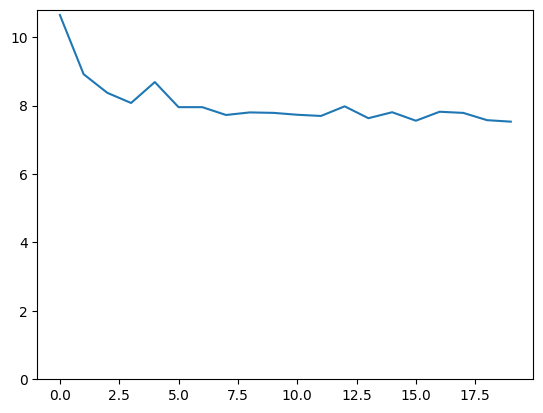

In [53]:
import pandas as pd

df = pd.DataFrame(metrics_pretrained_periodic)
df['train_losses'].plot(ylim = 0)

In [54]:
base_model = Model(1)
periodic_optimizer = torch.optim.Adam(base_model.parameters(), lr = 1e-3)
metrics_basic_periodic = periodic_train(base_model, periodic_optimizer, 20, num_blocks = 8)

Epoch 1, Train Loss: 10.3999, Val Loss: 9.7800
Epoch 2, Train Loss: 9.2521, Val Loss: 8.4219
Adding new block at epoch 2
added successfully
Epoch 3, Train Loss: 8.1467, Val Loss: 7.6700
Epoch 4, Train Loss: 7.2452, Val Loss: 6.6934
Adding new block at epoch 4
added successfully
Epoch 5, Train Loss: 6.8099, Val Loss: 6.2777
Epoch 6, Train Loss: 6.1989, Val Loss: 5.5647
Adding new block at epoch 6
added successfully
Epoch 7, Train Loss: 5.8273, Val Loss: 5.6113
Epoch 8, Train Loss: 5.5196, Val Loss: 5.2560
Adding new block at epoch 8
added successfully
Epoch 9, Train Loss: 5.3900, Val Loss: 5.0264
Epoch 10, Train Loss: 5.1964, Val Loss: 4.7582
Adding new block at epoch 10
added successfully
Epoch 11, Train Loss: 4.9974, Val Loss: 4.8105
Epoch 12, Train Loss: 4.8210, Val Loss: 4.4924
Adding new block at epoch 12
added successfully
Epoch 13, Train Loss: 4.7273, Val Loss: 4.2820
Epoch 14, Train Loss: 4.5984, Val Loss: 4.2865
Adding new block at epoch 14
added successfully
Epoch 15, Train Lo

<Axes: >

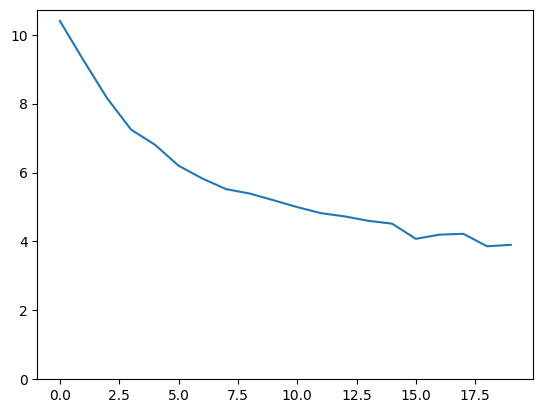

In [55]:
import pandas as pd

df = pd.DataFrame(metrics_basic_periodic)
df['train_losses'].plot(ylim = 0)

## Convergence Growth

In [56]:
base_model = Model(1).to(device)
convergence_optimizer = torch.optim.Adam(base_model.parameters(), lr = 1e-3)
metrics_basic_convergence = convergence_train(base_model, convergence_optimizer, 20, num_blocks = 8, patience=5, threshold=1e-3, moving_avg_window=5, stability_threshold=0.002)

Epoch 1, Train Loss: 10.4751, Val Loss: 9.8474
Epoch 2, Train Loss: 9.3595, Val Loss: 8.5005
Forcing block addition at epoch 2 due to period interval.
Added successfully
Epoch 3, Train Loss: 8.1087, Val Loss: 7.5172
Epoch 4, Train Loss: 7.1226, Val Loss: 6.6958
Forcing block addition at epoch 4 due to period interval.
Added successfully
Epoch 5, Train Loss: 6.5659, Val Loss: 6.0411
Epoch 6, Train Loss: 6.0369, Val Loss: 5.7106
Forcing block addition at epoch 6 due to period interval.
Added successfully
Epoch 7, Train Loss: 5.7447, Val Loss: 5.6820
Epoch 8, Train Loss: 5.7037, Val Loss: 5.3457
Forcing block addition at epoch 8 due to period interval.
Added successfully
Epoch 9, Train Loss: 5.3316, Val Loss: 4.9576
Epoch 10, Train Loss: 5.1263, Val Loss: 5.0886
Forcing block addition at epoch 10 due to period interval.
Added successfully
Epoch 11, Train Loss: 5.0822, Val Loss: 4.9176
Epoch 12, Train Loss: 4.7626, Val Loss: 5.0430
Forcing block addition at epoch 12 due to period interval.

<Axes: >

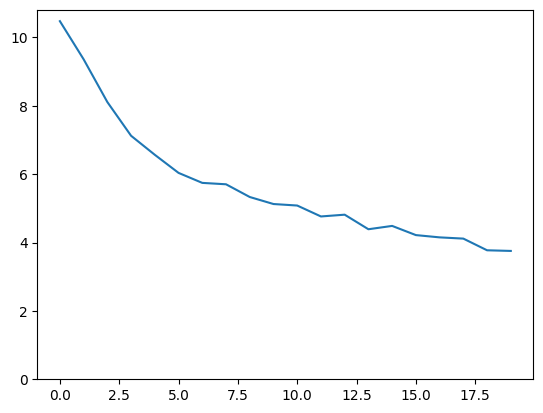

In [57]:
import pandas as pd

df = pd.DataFrame(metrics_basic_convergence)
df['train_losses'].plot(ylim = 0)

In [58]:
base_model = model.to(device)
convergence_optimizer = torch.optim.Adam(base_model.parameters(), lr = 1e-3)
metrics_pretrained_convergence = convergence_train(base_model, convergence_optimizer, 20, num_blocks = 4, patience=5, threshold=1e-3, moving_avg_window=5, stability_threshold=0.002)

Epoch 1, Train Loss: 7.5384, Val Loss: 7.5857
Epoch 2, Train Loss: 7.6571, Val Loss: 7.4633
Epoch 3, Train Loss: 7.6818, Val Loss: 7.5586
Epoch 4, Train Loss: 7.6258, Val Loss: 7.5195
Forcing block addition at epoch 4 due to period interval.
Added successfully
Epoch 5, Train Loss: 7.6170, Val Loss: 7.4562
Epoch 6, Train Loss: 7.5687, Val Loss: 7.4032
Epoch 7, Train Loss: 7.6913, Val Loss: 7.3496
Epoch 8, Train Loss: 7.4731, Val Loss: 7.4129
Forcing block addition at epoch 8 due to period interval.
Added successfully
Epoch 9, Train Loss: 7.7913, Val Loss: 7.6382
Epoch 10, Train Loss: 7.7638, Val Loss: 7.6955
Epoch 11, Train Loss: 7.7877, Val Loss: 7.6882
Epoch 12, Train Loss: 7.5149, Val Loss: 7.2469
Forcing block addition at epoch 12 due to period interval.
Added successfully
Epoch 13, Train Loss: 7.8433, Val Loss: 7.2915
Epoch 14, Train Loss: 7.7382, Val Loss: 7.6294
Epoch 15, Train Loss: 7.6155, Val Loss: 7.4336
Epoch 16, Train Loss: 7.6694, Val Loss: 7.6201
Forcing block addition at

<Axes: >

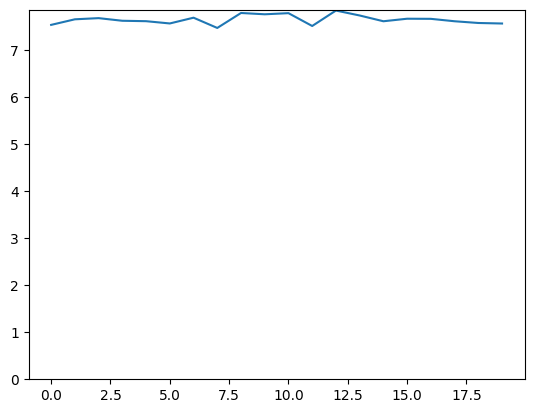

In [59]:
import pandas as pd

df = pd.DataFrame(metrics_pretrained_convergence)
df['train_losses'].plot(ylim = 0)

## FRAWGrow

In [60]:
# 0 -> 8
base_model = Model(1).to(device)
fragrow_optimizer = torch.optim.Adam(base_model.parameters(), lr = 1e-3)
metrics_basic_frawgrow = FRAWGrow_train(base_model, fragrow_optimizer, epochs=20, num_blocks=4, alpha=4.0, min_fine_tuning_epochs=100)

Epoch 1, Train Loss: 10.4204, Val Loss: 9.7909
Epoch 2, Train Loss: 9.3003, Val Loss: 8.7694
Epoch 3, Train Loss: 8.1402, Val Loss: 7.6185
Forcing block addition at epoch 4 due to period interval.
Added successfully
Epoch 4, Train Loss: 7.1268, Val Loss: 6.7654
Epoch 5, Train Loss: 6.7455, Val Loss: 6.3487
Epoch 6, Train Loss: 6.2023, Val Loss: 5.7988
Epoch 7, Train Loss: 5.7050, Val Loss: 5.8925
Forcing block addition at epoch 8 due to period interval.
Added successfully
Epoch 8, Train Loss: 5.5282, Val Loss: 4.9306
Epoch 9, Train Loss: 5.3625, Val Loss: 5.1414
Epoch 10, Train Loss: 4.9834, Val Loss: 4.9787
Epoch 11, Train Loss: 4.8578, Val Loss: 4.8481
Forcing block addition at epoch 12 due to period interval.
Added successfully
Epoch 12, Train Loss: 4.7101, Val Loss: 4.5126
Epoch 13, Train Loss: 4.7673, Val Loss: 4.5893
Epoch 14, Train Loss: 4.5241, Val Loss: 4.3105
Epoch 15, Train Loss: 4.4064, Val Loss: 4.0563
Forcing block addition at epoch 16 due to period interval.
Added succes

<Axes: >

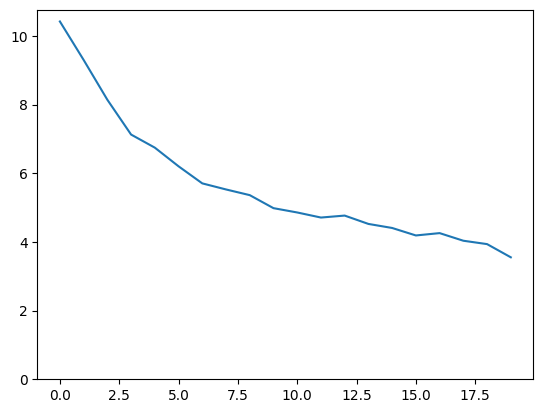

In [61]:
import pandas as pd

df = pd.DataFrame(metrics_basic_frawgrow)
df['train_losses'].plot(ylim = 0)

In [62]:
# 4 -> 8
base_model = model.to(device)
fragrow_optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
metrics_pretrained_frawgrow = FRAWGrow_train(base_model, fragrow_optimizer, epochs=20, num_blocks=4, alpha=4.0, min_fine_tuning_epochs=100)

Epoch 1, Train Loss: 7.4633, Val Loss: 7.2480
Epoch 2, Train Loss: 7.7081, Val Loss: 7.6137
Epoch 3, Train Loss: 7.4421, Val Loss: 7.6452
Forcing block addition at epoch 4 due to period interval.
Added successfully
Epoch 4, Train Loss: 7.7019, Val Loss: 7.8691
Epoch 5, Train Loss: 7.9647, Val Loss: 7.7621
Epoch 6, Train Loss: 7.7913, Val Loss: 7.9635
Epoch 7, Train Loss: 7.7601, Val Loss: 7.7284
Forcing block addition at epoch 8 due to period interval.
Added successfully
Epoch 8, Train Loss: 7.6767, Val Loss: 7.6277
Epoch 9, Train Loss: 8.1788, Val Loss: 7.7791
Epoch 10, Train Loss: 7.7882, Val Loss: 7.7357
Epoch 11, Train Loss: 7.7082, Val Loss: 7.6730
Forcing block addition at epoch 12 due to period interval.
Added successfully
Epoch 12, Train Loss: 7.6449, Val Loss: 7.8419
Epoch 13, Train Loss: 7.8909, Val Loss: 7.8246
Epoch 14, Train Loss: 7.7573, Val Loss: 7.7024
Epoch 15, Train Loss: 7.7226, Val Loss: 7.6157
Forcing block addition at epoch 16 due to period interval.
Added success

<Axes: >

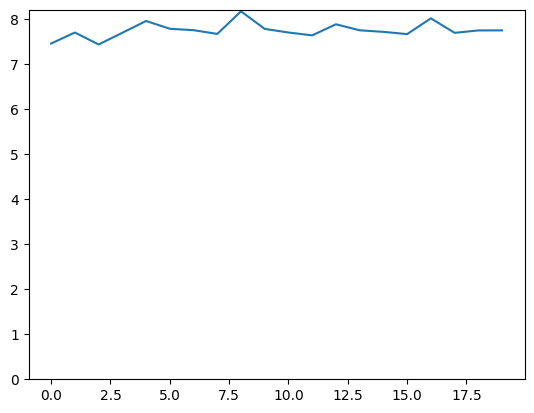

In [63]:
import pandas as pd

df = pd.DataFrame(metrics_pretrained_frawgrow)
df['train_losses'].plot(ylim = 0)

# Plots

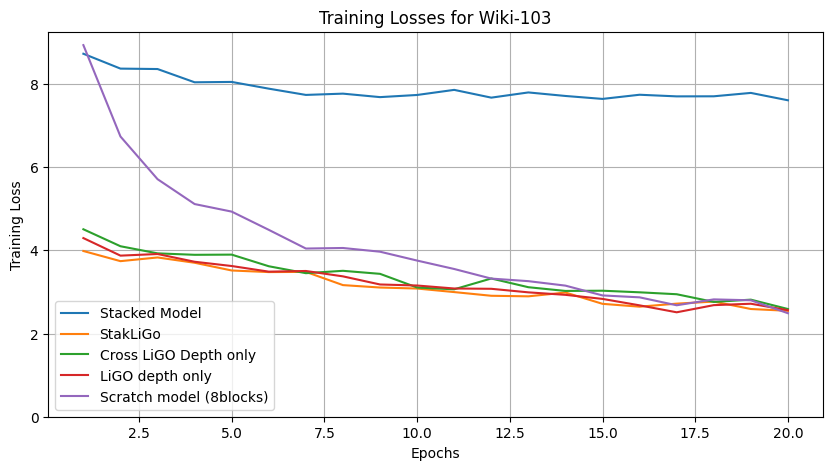

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Model names for reference
model_names = ["Stacked Model", "StakLiGo", "Cross LiGO Depth only", "LiGO depth only", "Scratch model (8blocks)"]
metrics_dfs = {
    "Stacked Model": pd.DataFrame(stacked_metrics),
    "StakLiGo": pd.DataFrame(sl_depth_metrics),
    "Cross LiGO Depth only": pd.DataFrame(cl_depth_metrics),
    "LiGO depth only": pd.DataFrame(ligo_depth_metrics),
    "Scratch model (8blocks)": pd.DataFrame(scratch_depth_width),
}

plt.figure(figsize=(10, 5))
for model1 in model_names:
    plt.plot(range(1, 21), metrics_dfs[model1]["train_losses"][:20], label=model1)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Losses for Wiki-103")
plt.legend()
plt.grid()
plt.ylim(bottom=0)  # Set Y-axis to start from 0
plt.show()


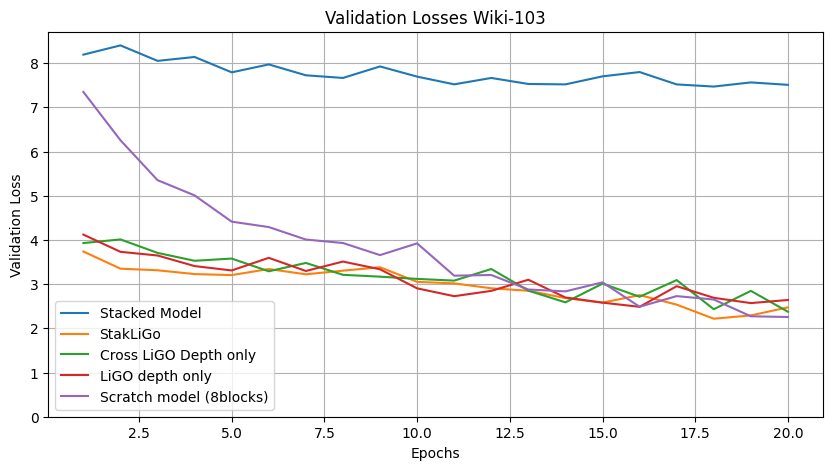

In [65]:
plt.figure(figsize=(10, 5))
for model1 in model_names:
    plt.plot(range(1, 21), metrics_dfs[model1]["val_losses"][:20], label=model1)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Losses Wiki-103")
plt.legend()
plt.grid()
plt.ylim(bottom=0)  # Set Y-axis to start from 0
plt.show()


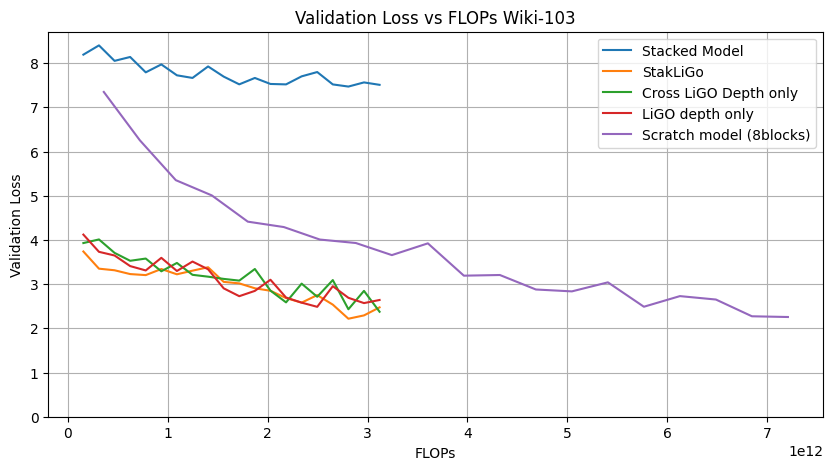

In [66]:
plt.figure(figsize=(10, 5))
for model1 in model_names:
    df = metrics_dfs[model1].sort_values(by="flops")  # Ensure FLOPs are sorted
    plt.plot(df["flops"], df["val_losses"], label=model1, linestyle='-')  # Line graph with markers
plt.xlabel("FLOPs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs FLOPs Wiki-103")
plt.legend()
plt.grid()
plt.ylim(bottom=0)  # Set Y-axis to start from 0
plt.show()


# All plots

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Model names for reference
model_names = [
    "Stacked Model",
    "StakLiGo",
    "Cross LiGO Depth only",
    "LiGO depth only",
    "Scratch model (8blocks)",
    "Base model (4blocks)",
    "Periodic pretrained 4 -> 8",
    "Periodic 0 -> 8",
    "Convergence pretrained 4 -> 8",
    "Convergence 0 -> 8",
    "FrawGrow pretrained 4 -> 8",
    "FrawGrow 0 -> 8"
]

metrics_dfs = {
    "Stacked Model": pd.DataFrame(stacked_metrics),
    "StakLiGo": pd.DataFrame(sl_depth_metrics),
    "Cross LiGO Depth only": pd.DataFrame(cl_depth_metrics),
    "LiGO depth only": pd.DataFrame(ligo_depth_metrics),
    "Scratch model (8blocks)": pd.DataFrame(scratch_depth_width),
    "Base model (4blocks)": pd.DataFrame(metrics_basic_Shakespeare),
    "Periodic pretrained 4 -> 8": pd.DataFrame(metrics_pretrained_periodic),
    "Periodic 0 -> 8": pd.DataFrame(metrics_basic_periodic),
    "Convergence pretrained 4 -> 8": pd.DataFrame(metrics_pretrained_convergence),
    "Convergence 0 -> 8": pd.DataFrame(metrics_basic_convergence),
    "FrawGrow pretrained 4 -> 8": pd.DataFrame(metrics_pretrained_frawgrow),
    "FrawGrow 0 -> 8": pd.DataFrame(metrics_basic_frawgrow),

}

### Training Loss

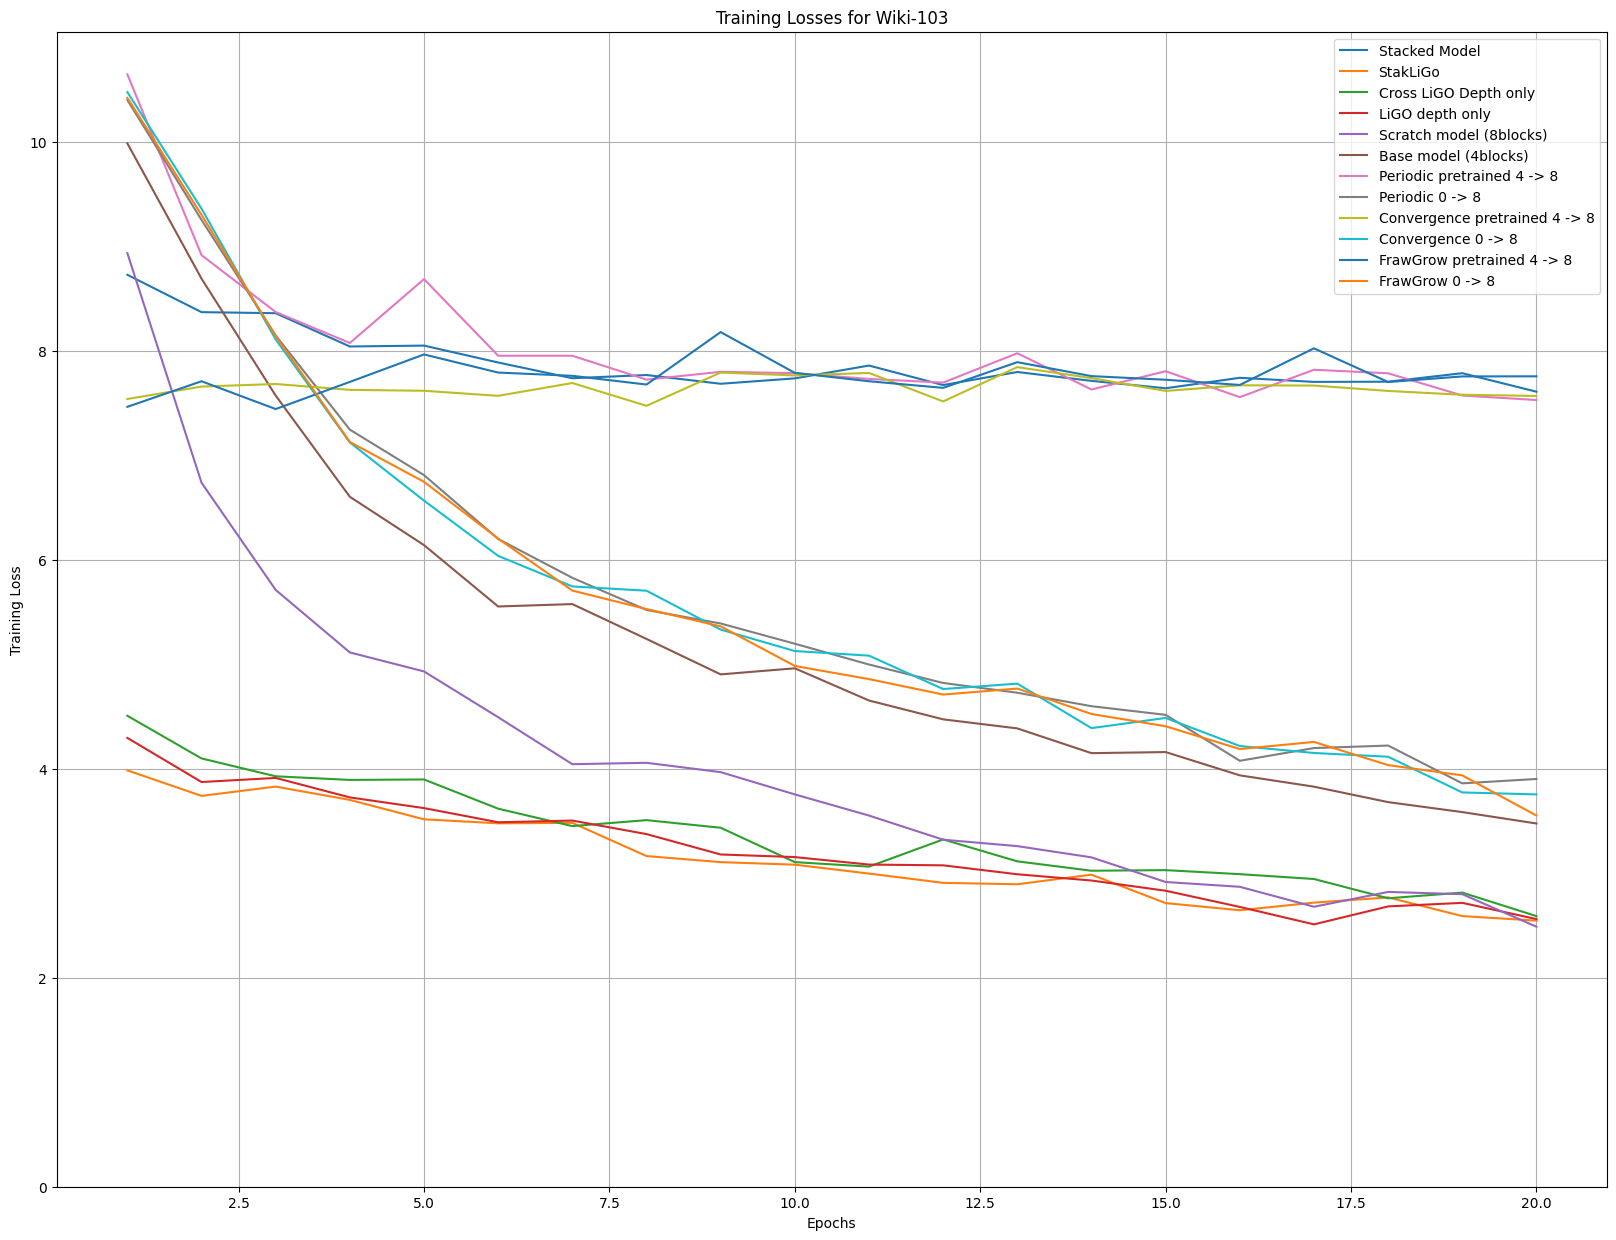

In [68]:
plt.figure(figsize=(20, 15))
for model1 in model_names:
    plt.plot(range(1, 21), metrics_dfs[model1]["train_losses"][:20], label=model1)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Losses for Wiki-103")
plt.legend()
plt.grid()
plt.ylim(bottom=0)  # Set Y-axis to start from 0
plt.show()


### Validation loss

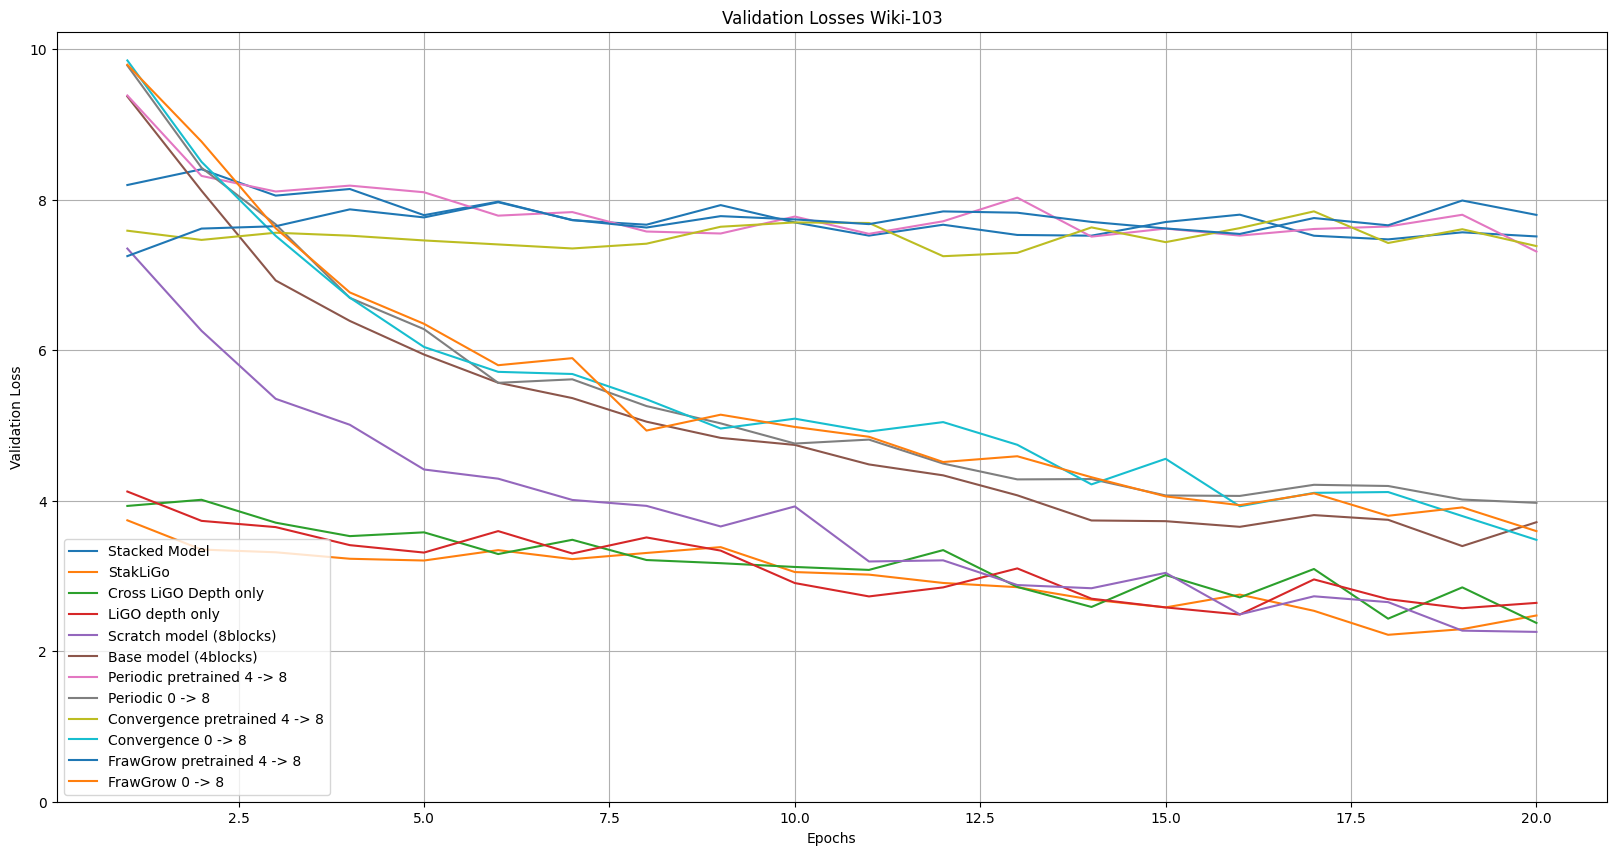

In [69]:
plt.figure(figsize=(20, 10))
for model1 in model_names:
    plt.plot(range(1, 21), metrics_dfs[model1]["val_losses"][:20], label=model1)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Losses Wiki-103")
plt.legend()
plt.grid()
plt.ylim(bottom=0)  # Set Y-axis to start from 0
plt.show()


### Validation Loss Vs. TFLOPs

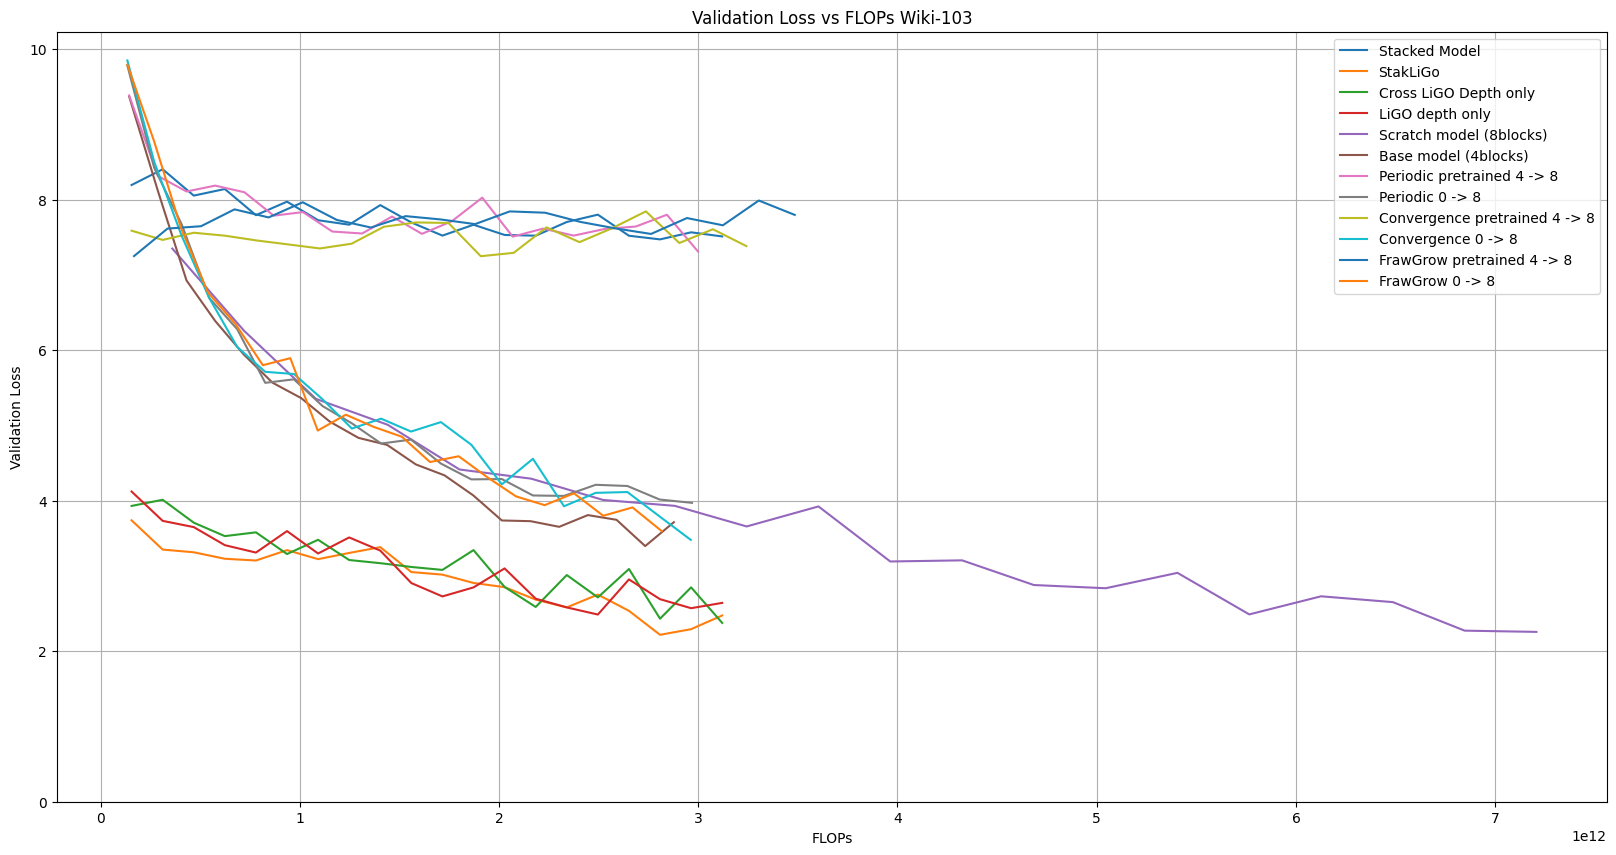

In [70]:
plt.figure(figsize=(20, 10))
for model1 in model_names:
    df = metrics_dfs[model1].sort_values(by="flops")  # Ensure FLOPs are sorted
    plt.plot(df["flops"], df["val_losses"], label=model1, linestyle='-')  # Line graph with markers
plt.xlabel("FLOPs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs FLOPs Wiki-103")
plt.legend()
plt.grid()
plt.ylim(bottom=0)  # Set Y-axis to start from 0
plt.show()


# When to Grow Policy

In [71]:
epochs = 500
add_blocks = 4

## Periodic Growth

In [72]:
# based on epochs and blocks -> each block will be added at epochs / (num_blocks+1)
# if epochs = 3, blocks = 2
# |-------base model--------|-----block1-----------|-----------block2----------|



## Convergence Growth

## LipGrow Method

## ORL FRAWGrow Policy

## Growth Order

## Appending

## Inserting in start

## RRS

# Hyperparameters

## α - learning rate